<h1><u>Trabajo Práctico 1 : Reservas de Hotel</u></h1>




# **Analisis Exploratorio de los datos**



Importamos las librerías a usar:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency

Importamos el dataset:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

hoteles_train=pd.read_csv('/content/drive/MyDrive/Tp_Datos_2023_2°/hotels_train.csv')
hoteles_test=pd.read_csv('/content/drive/MyDrive/Tp_Datos_2023_2°/hotels_test.csv')


Mounted at /content/drive


Realizamos una primera observación:

In [3]:
hoteles_train

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,No Deposit,9.0,NaN,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,No Deposit,NaN,NaN,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,No Deposit,9.0,NaN,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,Non Refund,154.0,NaN,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,No Deposit,20.0,NaN,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,No Deposit,240.0,NaN,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
61909,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,No Deposit,NaN,NaN,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
61910,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,No Deposit,NaN,153.0,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,Non Refund,96.0,NaN,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1


Obtenemos algunos datos iniciales:

In [4]:
print(f"Cantidad de filas: {hoteles_train.shape[0]}");
print(f"Cantidad de columnas: {hoteles_train.shape[1]}");

Cantidad de filas: 61913
Cantidad de columnas: 31


In [5]:
hoteles_train.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

---
# Tipo de dato de cada columna

Primero identificamos el significado de cada columna:

* hotel: Indica el nombre de hotel
* lead_time: Cantidad de días entre que llega la reserva a los servidores del hotel y el día que el huésped entra al hotel
* arrival_date_year: Año de arribo
* arrival_date_month: Mes de arribo
* arrival_date_week_number: Número de semaña del año en que arribo
* arrival_date_day_of_month: Día del mes de arribo
* stays_in_weekends_nights: Cantidad de noches durante el fin de semana
* stays_in_week_nights: Cantidad de noches reservadas de lunes a viernes
* adults: Cantidad de adultos que viajaron
* children: Cantidad de niños que viajaron
* babies: Cantidad de bebes que viajaron
* meal: Describe las comidas cubiertas por la reserva
* country: País de procedencia del pasajero
* market_segment: Segmento del mercado al que pertenece la reserva
* distribution_channel: Canal por el que se realizo la reserva
* is_repeated_guest: Indica si es un huésped repetido
* previous_cancellations: Indica el número de reservas previas canceladas por el cliente respecto de la reserva actual
* previous_bookings_not_canceled: Indica si tuvo reservas previas no canceladas
* reserved_room_type: Tipo de la habitacion pedida/ reservada
* assigned_room_type: Tipo de la habitacion asignada
* booking_changes: Indica si el cliente pidio cambio del tipo de la habitacion
* deposit_type: Indica el tipo de deposito que utilizó para garantizar la reserva
* agent: Indica el id del agente de viaje que realizo la reserva
* company: Indica el id de la compania que hizo la reserva
* days_in_waiting_list: Indica cuantos dias de espera tuvo la reserva antes de ser asignada
* customer_type: Tipo de cliente
* adr: (Total de ingresos por alojamiento) / (Total de noches de estancia en un período)
* required_car_parking_spaces: Cantidad de cocheras pedidas
* total_of_special_requests: Cantidad de pedidos especiales del cliente (ej: high floor, twin bed, etc)
* id: Identificador de la reserva
* is_canceled: Indica si fue cancelada la reserva




Observamos de que tipo de dato es cada columna, dividimos las variables en las siguientes categorías:



*   Variables cuantitativas
    * Discreta
    * Continua
*   Variables cualitativas
    * Nominal
    * Ordinal



---
# Variables cuantitativas

Identificamos como cuantitativas las siguientes variables:

* Son cuantitativas discretas:
  * **lead_time**: Toma como valores cantidad de días enteros. Ej: (277, 286, 0)

  * **arrival_date_year**: Toma como valores cantidad de años enteros. Ej: (2015, 2016, 2017)

  * **arrival_date_week_number**: Toma como valores cantidad de semanas del año. Ej: (46, 20, 35)

  * **arrival_date_day_of_month**: Toma como valores día del mes. Ej: (7, 11, 23)

  * **stays_in_weekend_nights** y **stays_in_week_nights**: Toman como valores cantidad de noches. Ej: (1, 0, 2)

  * **adults**, **children** y **babies**: Toman como valor cantidad de personas, ej: (1,2,3)

  * **previous_cancellations** y **previous_bookings_not_canceled**: Toman como valor cantidad de reservas. Ej: (0, 1, 2)

  * **booking_changes** : Toma como valor cantidad de cambios en la reserva. Ej: (0,1,2)

  * **days_in_waiting_list**: Toma como valor cantidad de días. Ej: (0,1,2)

  * **required_car_parking_spaces**: Toma como valor cantidad de espacios. Ej: (0,1,2)

  * **total_of_special_requests**: Toma como valor cantidad de pedidos. Ej: (0,1,2)

* Son cuantitativas continuas:

  * **adr**: Toma como valor un porcentaje. Ej: (100.0, 163.3, 153.67)

Observamos las estadísticas de estas variables:

In [6]:
vars_cuantitativas = ['lead_time',
                      'arrival_date_year',
                      'arrival_date_week_number',
                      'arrival_date_day_of_month',
                      'stays_in_weekend_nights',
                      'stays_in_week_nights',
                      'adults',
                      'children',
                      'babies',
                      'previous_cancellations',
                      'previous_bookings_not_canceled',
                      'booking_changes',
                      'days_in_waiting_list',
                      'required_car_parking_spaces',
                      'total_of_special_requests',
                      'adr']

hoteles_train[vars_cuantitativas].describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,adr
count,61913.000000,61913.000000,61913.00000,61913.000000,61913.000000,61913.000000,61913.000000,61909.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000
mean,112.248187,2016.154749,27.21808,15.785812,0.924135,2.510054,1.862791,0.104896,0.007155,0.114790,0.115420,0.195952,2.638977,0.049957,0.523703,102.383773
std,110.717953,0.708389,13.52601,8.795489,0.993101,1.884926,0.589066,0.402847,0.092158,0.993723,1.396359,0.610519,18.619092,0.221023,0.775412,47.757640
min,0.000000,2015.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000
25%,23.000000,2016.000000,16.00000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000
50%,78.000000,2016.000000,28.00000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000
75%,172.000000,2017.000000,38.00000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,126.000000
max,629.000000,2017.000000,53.00000,31.000000,16.000000,40.000000,55.000000,10.000000,9.000000,26.000000,70.000000,17.000000,391.000000,8.000000,5.000000,510.000000


Realizamos histogramas de estas variables para poder visualizar mejor sus valores:

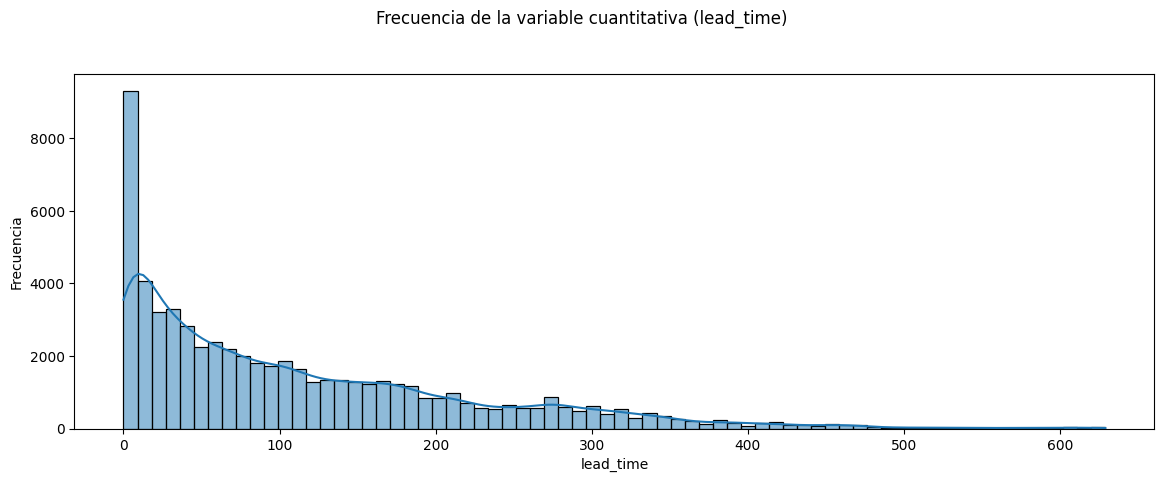

In [7]:
fig, ax = plt.subplots(1,1, figsize=(12, 5))
fig.suptitle('Frecuencia de la variable cuantitativa (lead_time)')

sns_hist=sns.histplot(bins=70, data=hoteles_train['lead_time'], kde=True, alpha = 0.5).set(xlabel="lead_time",ylabel="Frecuencia")

fig.tight_layout(pad=2.0)
fig.show()

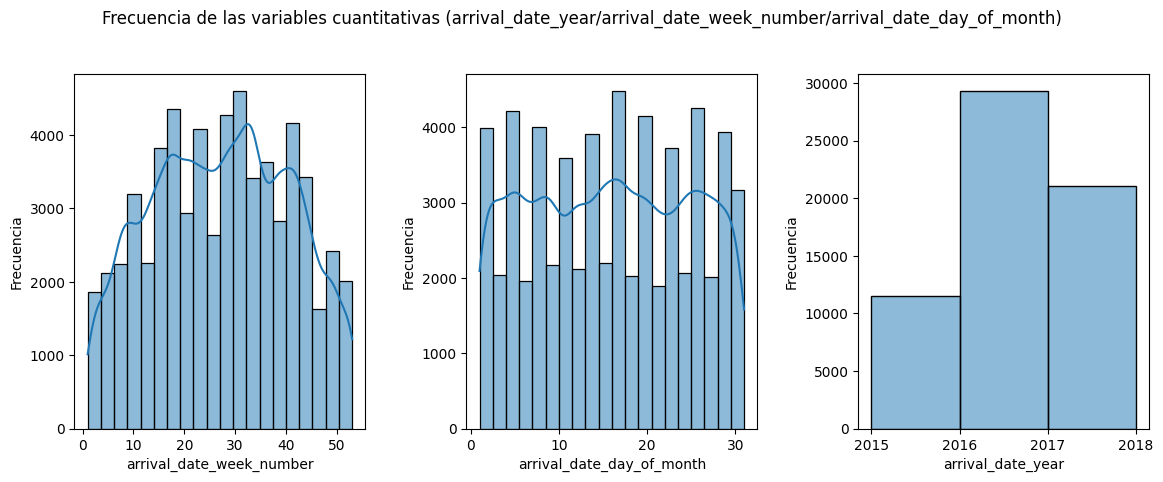

In [8]:
fig, ax = plt.subplots(1,3, figsize=(12, 5))
fig.suptitle('Frecuencia de las variables cuantitativas (arrival_date_year/arrival_date_week_number/arrival_date_day_of_month)')

anios = np.array([2015,2016,2017,2018])
sns_hist=sns.histplot(bins=anios, data=hoteles_train['arrival_date_year'], alpha = 0.5).set(xlabel="arrival_date_year",ylabel="Frecuencia", xticks=anios)
plt.sca(ax[0])

sns_hist=sns.histplot(bins=20, data=hoteles_train['arrival_date_week_number'], kde=True, alpha = 0.5).set(xlabel="arrival_date_week_number",ylabel="Frecuencia")
plt.sca(ax[1])

sns_hist=sns.histplot(bins=20, data=hoteles_train['arrival_date_day_of_month'], kde=True, alpha = 0.5).set(xlabel="arrival_date_day_of_month",ylabel="Frecuencia")
plt.sca(ax[2])



fig.tight_layout(pad=2.0)
fig.show()

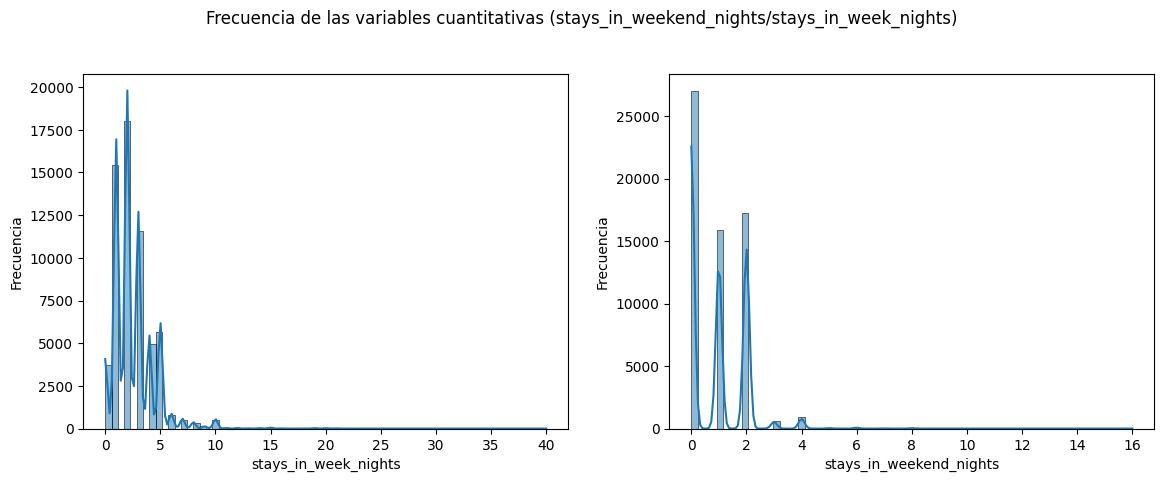

In [9]:
fig, ax = plt.subplots(1,2, figsize=(12, 5))
fig.suptitle('Frecuencia de las variables cuantitativas (stays_in_weekend_nights/stays_in_week_nights)')

sns_hist=sns.histplot(bins=70, data=hoteles_train['stays_in_weekend_nights'], kde=True, alpha = 0.5).set(xlabel="stays_in_weekend_nights",ylabel="Frecuencia")
plt.sca(ax[0])

sns_hist=sns.histplot(bins=70, data=hoteles_train['stays_in_week_nights'], kde=True, alpha = 0.5).set(xlabel="stays_in_week_nights",ylabel="Frecuencia")
plt.sca(ax[1])

fig.tight_layout(pad=2.0)
fig.show()

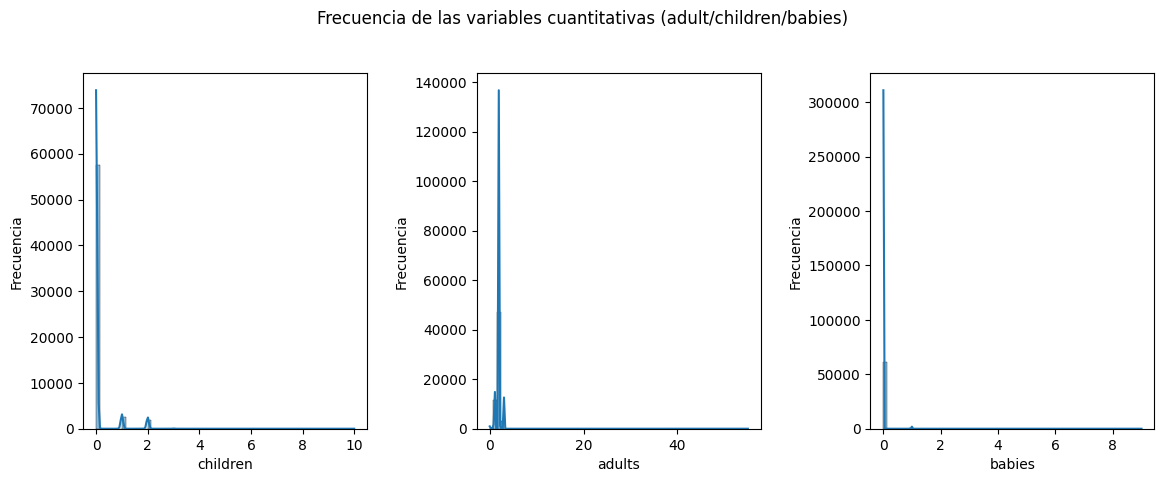

In [10]:
fig, ax = plt.subplots(1,3, figsize=(12, 5))
fig.suptitle('Frecuencia de las variables cuantitativas (adult/children/babies)')

sns_hist=sns.histplot(bins=70, data=hoteles_train['babies'], kde=True, alpha = 0.5).set(xlabel="babies",ylabel="Frecuencia")
plt.sca(ax[0])

sns_hist=sns.histplot(bins=70, data=hoteles_train['children'], kde=True, alpha = 0.5).set(xlabel="children",ylabel="Frecuencia")
plt.sca(ax[1])

sns_hist=sns.histplot(bins=70, data=hoteles_train['adults'], kde=True, alpha = 0.5).set(xlabel="adults",ylabel="Frecuencia")
plt.sca(ax[2])
fig.tight_layout(pad=2.0)
fig.show()

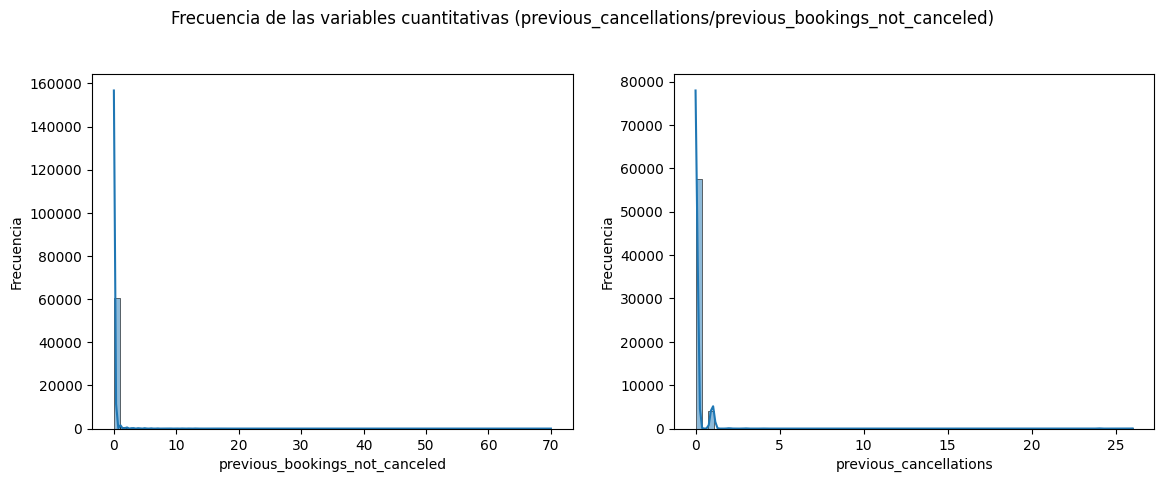

In [11]:
fig, ax = plt.subplots(1,2, figsize=(12, 5))
fig.suptitle('Frecuencia de las variables cuantitativas (previous_cancellations/previous_bookings_not_canceled)')

sns_hist=sns.histplot(bins=70, data=hoteles_train['previous_cancellations'], kde=True, alpha = 0.5).set(xlabel="previous_cancellations",ylabel="Frecuencia")
plt.sca(ax[0])

sns_hist=sns.histplot(bins=70, data=hoteles_train['previous_bookings_not_canceled'], kde=True, alpha = 0.5).set(xlabel="previous_bookings_not_canceled",ylabel="Frecuencia")
plt.sca(ax[1])

fig.tight_layout(pad=2.0)
fig.show()

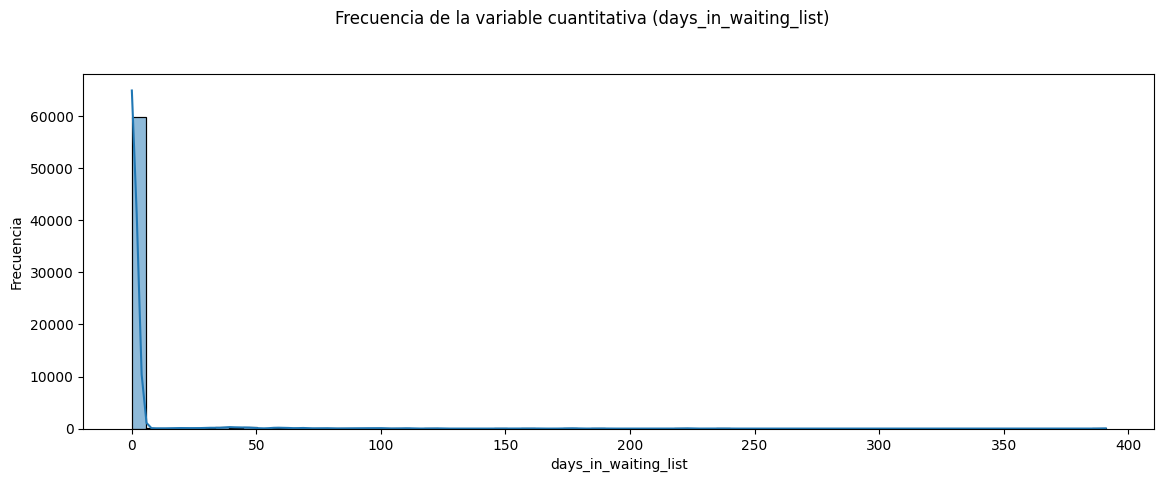

In [12]:
fig, ax = plt.subplots(1,1, figsize=(12, 5))
fig.suptitle('Frecuencia de la variable cuantitativa (days_in_waiting_list)')

sns_hist=sns.histplot(bins=70, data=hoteles_train['days_in_waiting_list'], kde=True, alpha = 0.5).set(xlabel="days_in_waiting_list",ylabel="Frecuencia")

fig.tight_layout(pad=2.0)
fig.show()

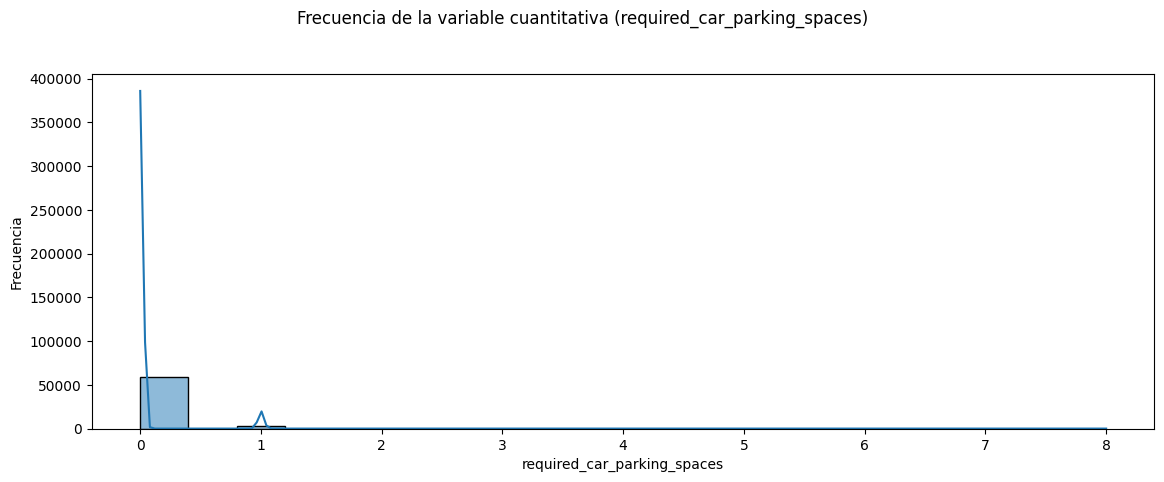

In [13]:
fig, ax = plt.subplots(1,1, figsize=(12, 5))
fig.suptitle('Frecuencia de la variable cuantitativa (required_car_parking_spaces)')

sns_hist=sns.histplot(bins=20, data=hoteles_train['required_car_parking_spaces'], kde=True, alpha = 0.5).set(xlabel="required_car_parking_spaces",ylabel="Frecuencia")

fig.tight_layout(pad=2.0)
fig.show()

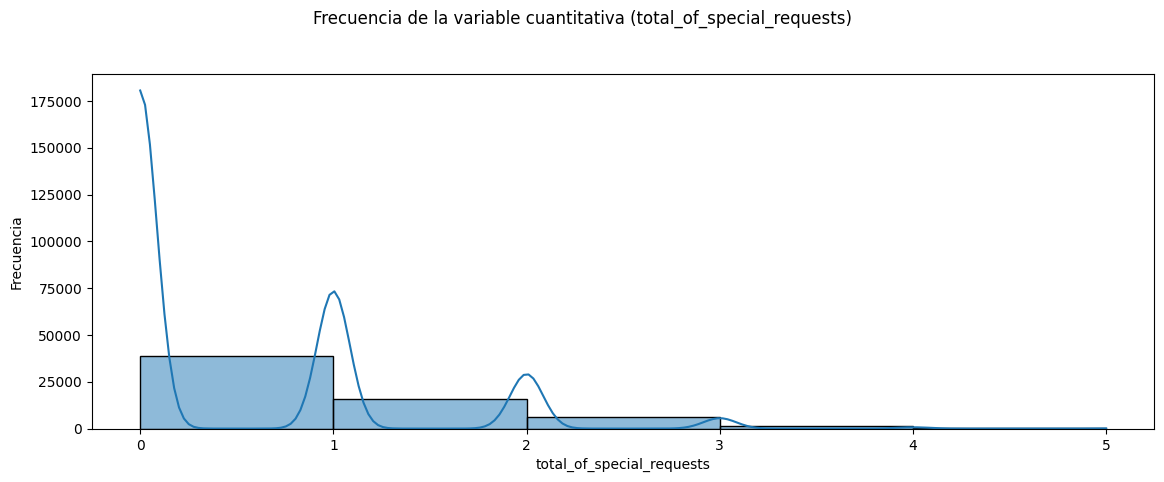

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12, 5))
fig.suptitle('Frecuencia de la variable cuantitativa (total_of_special_requests)')

sns_hist=sns.histplot(bins=5, data=hoteles_train['total_of_special_requests'], kde=True, alpha = 0.5).set(xlabel="total_of_special_requests",ylabel="Frecuencia")

fig.tight_layout(pad=2.0)
fig.show()

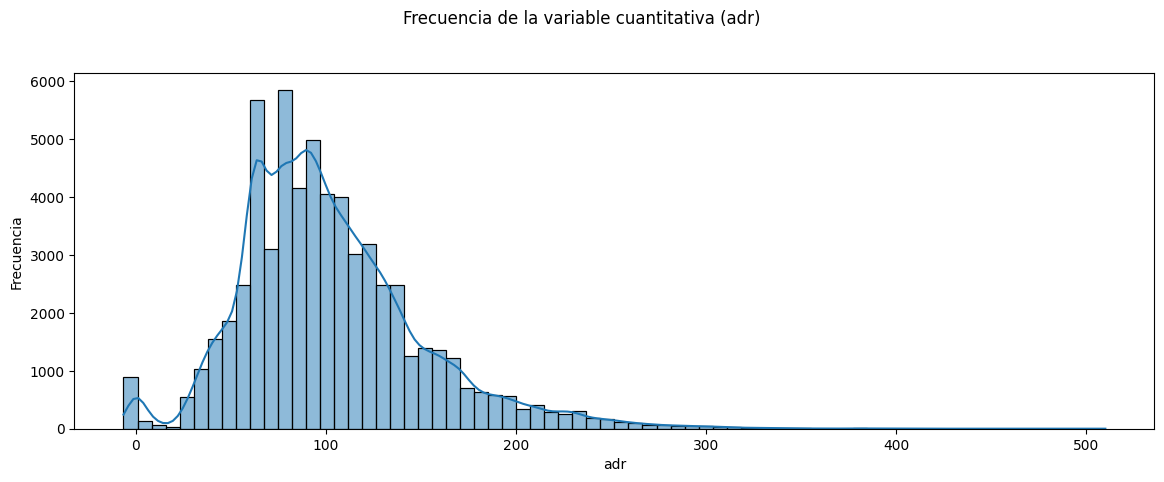

In [15]:
fig, ax = plt.subplots(1,1, figsize=(12, 5))
fig.suptitle('Frecuencia de la variable cuantitativa (adr)')

sns_hist=sns.histplot(bins=70, data=hoteles_train['adr'], kde=True, alpha = 0.5).set(xlabel="adr",ylabel="Frecuencia")

fig.tight_layout(pad=2.0)
fig.show()

---
# Variables cualitativas



Identificamos como cualitativas las siguientes variables:

* Son cualitativas nominales:
  * **hotel**: Toma como valor el nombre del hotel, Ej: (City Hotel, Resort Hotel)

  * **meal**: Toma como valor un tipo de comida ofrecida Ej:
      * Undefined/SC (Ninguna)
      * BB (Ofrece desayuno)
      * HB (Ofrece desayuno y otra comida, generalmente cena)
      * FB (Ofrece desayuno, almuerzo y cena)

  * **country**: Toma como valor una etiqueta representando el nombre de un país. Ej: ('PRT', 'FRA', 'DEU')

  * **market_segment**: Toma como valor el tipo de reserva. Ej: ('Offline TA/TO', 'Corporate', 'Direct')

  * **distribution_channel**: Toman como valor tipo de canal por la que se realizó la reserva. Ej: ('TA/TO', 'Direct')

  * **is_repeated_guest**: Indica si es un huésped repetido (1) o no (0)

  * **reserved_room_type** y **assigned_room_type**: Toman como valor una letra identificando el tipo de habitación. Ej: ('A', 'B', 'C')

  * **deposit_type** : Indica el tipo de deposito que utilizó para garantizar la reserva ("No deposit" = No pagó, "No refund" = Pagó la totalidad, "Refundable" = Una seña)

  * **agent**, **company** y **id**: Es un id único representando a un agente de viaje, una compañía y el id de la reserva respectivamente

  * **customer_type**: Indica el tipo de cliente. Ej: (Transient-Party, Transient, Contract)

  * **is_canceled**: Indica si fue cancelada la reserva (1) o no (0)

* Son cuantitativas ordinales:

  * **arrival_date_month**: Toma como valor un mes. Ej: ('November', 'May')

A continuación observamos cada columna con valores cualitativos y todos sus posibles valores:

In [16]:
vars_cualitativas = [ 'hotel',
                      'meal',
                      'country',
                      'market_segment',
                      'distribution_channel',
                      'is_repeated_guest',
                      'reserved_room_type',
                      'assigned_room_type',
                      'deposit_type',
                      'agent',
                      'company',
                      'id',
                      'customer_type',
                      'is_canceled']

hoteles_train_cualitativas = hoteles_train[vars_cualitativas]

for col in hoteles_train_cualitativas:
  print(f"Valores que toma la columna: {col}")
  print(hoteles_train_cualitativas[col].unique())
  print("\n");

Valores que toma la columna: hotel
['City Hotel' 'Resort Hotel']


Valores que toma la columna: meal
['BB' 'HB' 'SC' 'Undefined' 'FB']


Valores que toma la columna: country
['USA' 'PRT' 'CHE' 'FRA' 'AGO' 'GBR' 'DEU' 'ESP' 'ROU' 'SWE' 'IRL' 'CN'
 'ITA' 'NLD' 'NOR' 'MAR' 'IND' 'BEL' 'ISR' 'KOR' 'TUN' 'JPN' 'FIN' 'TUR'
 'CHN' 'AUT' 'ZAF' 'LUX' 'BRA' 'POL' 'DNK' 'IRN' 'RUS' 'VEN' 'SEN' 'AUS'
 'MLT' 'BGR' 'THA' 'GEO' 'SRB' 'PHL' 'ARG' 'LVA' 'LTU' 'ARE' nan 'VNM'
 'MOZ' 'MEX' 'HUN' 'DZA' 'GAB' 'UKR' 'SVN' 'HRV' 'SVK' 'CHL' 'BLR' 'CPV'
 'CRI' 'EST' 'TWN' 'ALB' 'SGP' 'PRI' 'IDN' 'DOM' 'MUS' 'OMN' 'EGY' 'SAU'
 'NZL' 'FRO' 'CYP' 'PER' 'CZE' 'GRC' 'ARM' 'COL' 'PAK' 'MDG' 'HKG' 'MYS'
 'MKD' 'ISL' 'BIH' 'NGA' 'AZE' 'MAC' 'JEY' 'SUR' 'KWT' 'BGD' 'IRQ' 'MDV'
 'GGY' 'VGB' 'ECU' 'URY' 'ETH' 'LBN' 'BOL' 'QAT' 'JOR' 'COM' 'GNB' 'MYT'
 'UGA' 'BEN' 'GIB' 'KAZ' 'TZA' 'LBY' 'SYC' 'PRY' 'MNE' 'ZWE' 'CAF' 'ATA'
 'MWI' 'JAM' 'AND' 'LIE' 'FJI' 'TJK' 'LKA' 'HND' 'PAN' 'CMR' 'KNA' 'KEN'
 'UMI' 'PYF' 'GLP' 'BRB' '

Mostramos con un gráfico la frecuencia con la que toman estos valores:

<Axes: title={'center': "Frecuencia de valores de la categoría 'hotel' "}, xlabel='Hoteles', ylabel='Cantidad'>

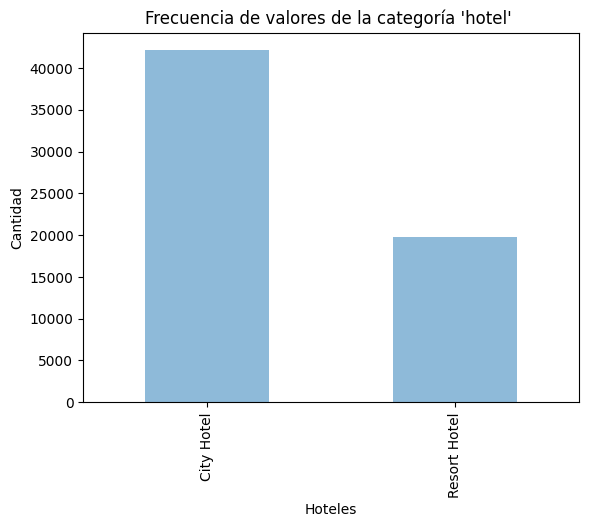

In [17]:
hoteles_train['hotel'].value_counts().plot.bar(alpha=0.5 , title="Frecuencia de valores de la categoría 'hotel' " , xlabel="Hoteles" , ylabel="Cantidad")

<Axes: title={'center': "Frecuencia de posibles valores de la variable 'meal' "}, xlabel='meal', ylabel='Cantidad'>

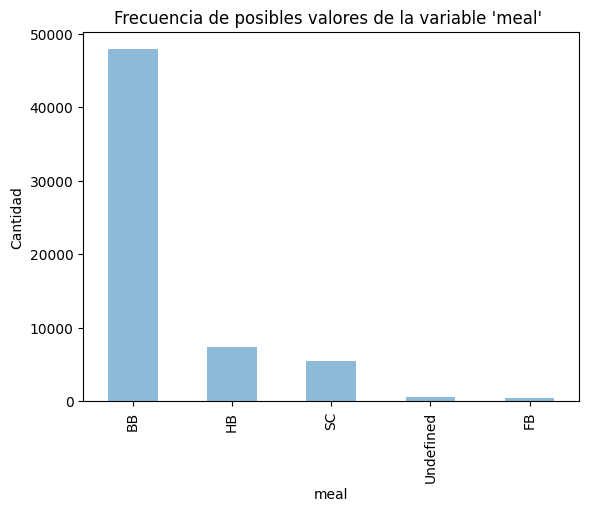

In [18]:
hoteles_train['meal'].value_counts().plot.bar(alpha=0.5 , title="Frecuencia de posibles valores de la variable 'meal' " , xlabel="meal" , ylabel="Cantidad")

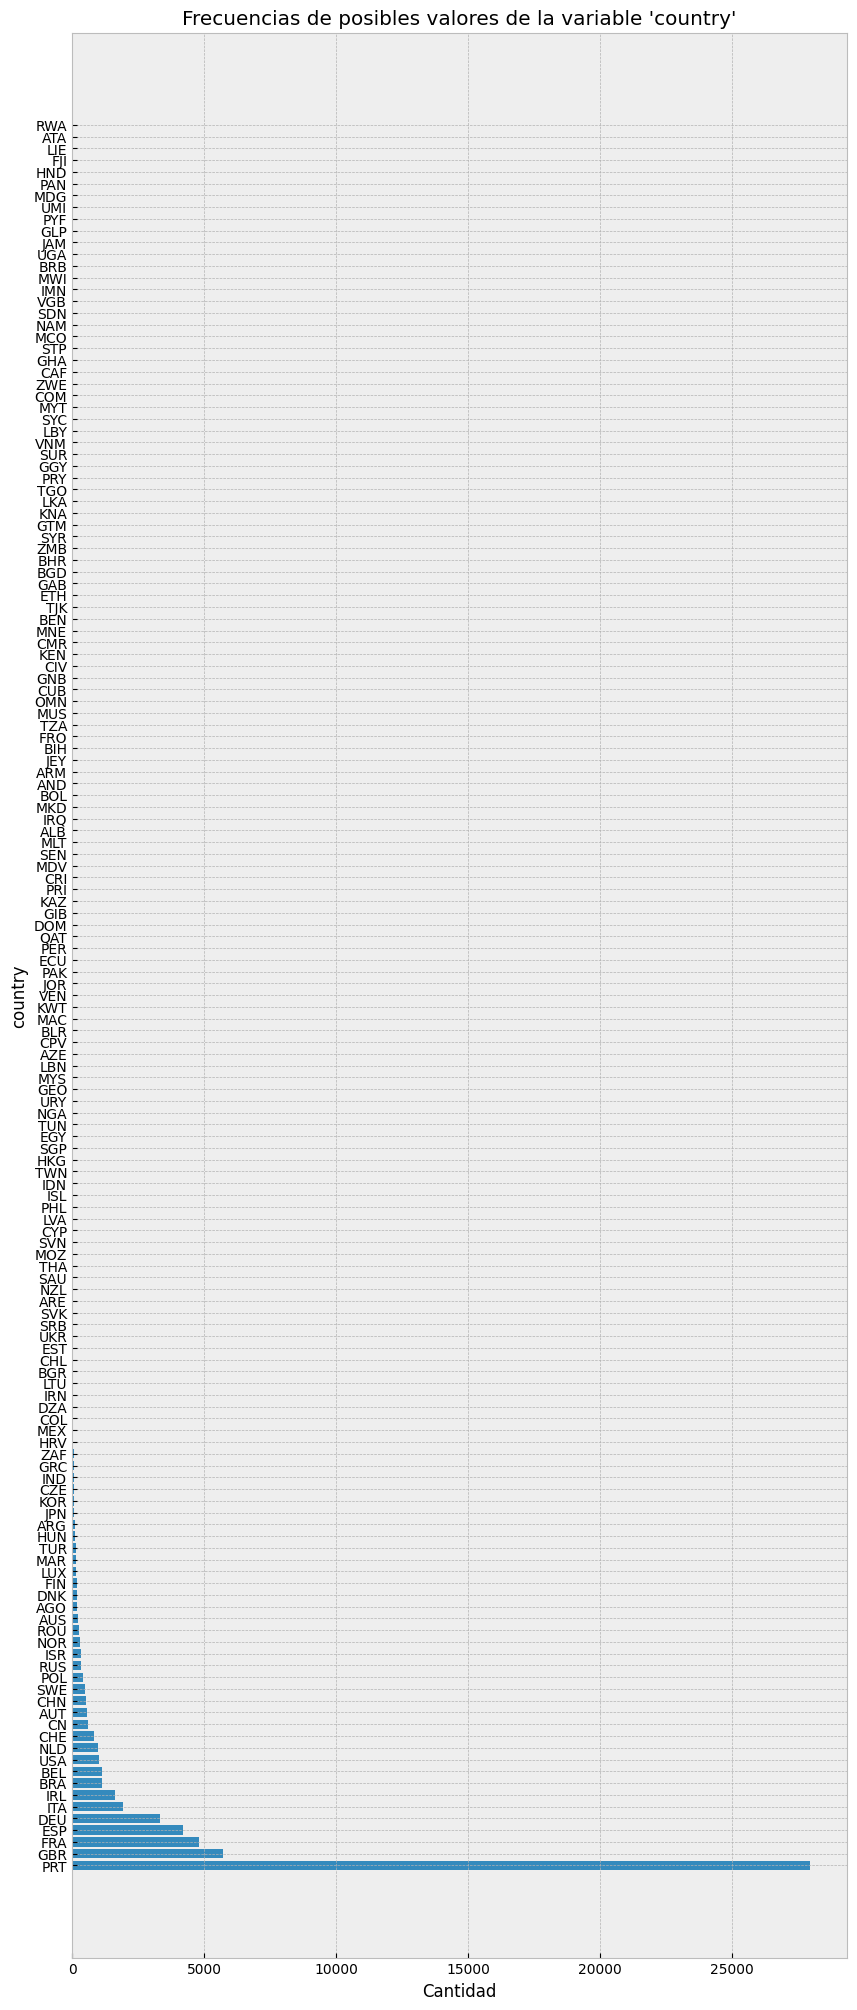

In [ ]:
nombre_var = "country"
tabla_paises = hoteles_train[nombre_var].value_counts()

eje_x = tabla_paises.index.tolist()
eje_y = tabla_paises.tolist()

plt.rcParams['figure.figsize'] = [10, 25]

plt.style.use("bmh")
plt.barh(eje_x, eje_y)

plt.ylabel(nombre_var)
plt.xlabel('Cantidad')
plt.title(f"Frecuencias de posibles valores de la variable '{nombre_var}'")

plt.show()
plt.rcParams['figure.figsize'] = [7, 7]

<Axes: title={'center': "Frecuencia de valores posibles de la variable 'market_segment' "}, xlabel='market_segment', ylabel='Cantidad'>

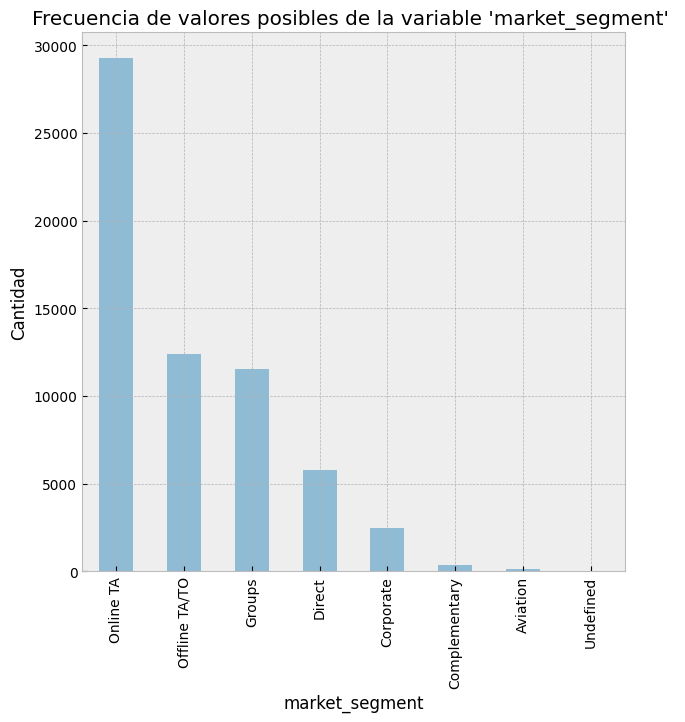

In [ ]:
hoteles_train['market_segment'].value_counts().plot.bar(alpha=0.5 , title="Frecuencia de valores posibles de la variable 'market_segment' " , xlabel="market_segment" , ylabel="Cantidad")

<Axes: title={'center': "Frecuencia de valores posibles de la variable 'distribution_channel' "}, xlabel='distribution_channel', ylabel='Cantidad'>

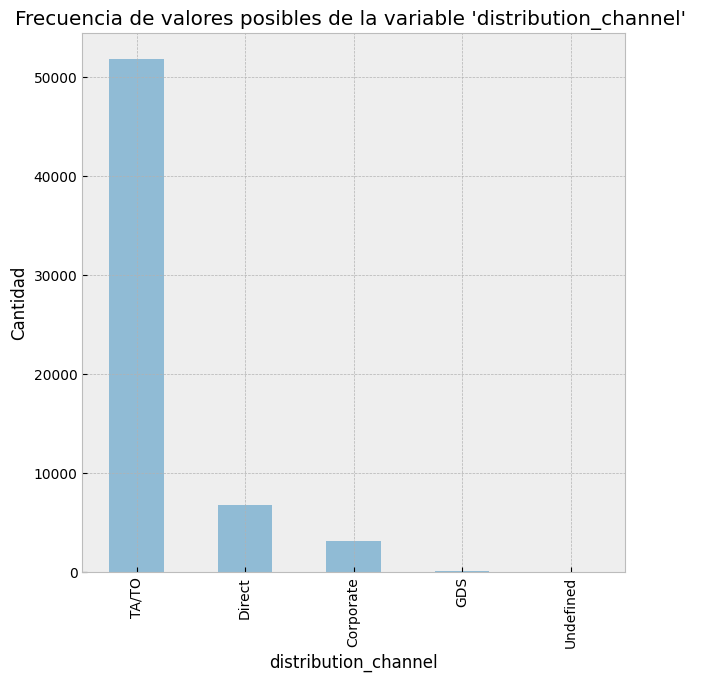

In [ ]:
nombre_columna = 'distribution_channel'
hoteles_train[nombre_columna].value_counts().plot.bar(alpha=0.5 , title=f"Frecuencia de valores posibles de la variable '{nombre_columna}' " , xlabel=nombre_columna , ylabel="Cantidad")

<Axes: title={'center': "Frecuencia de valores posibles de la variable 'is_repeated_guest' "}, xlabel='is_repeated_guest', ylabel='Cantidad'>

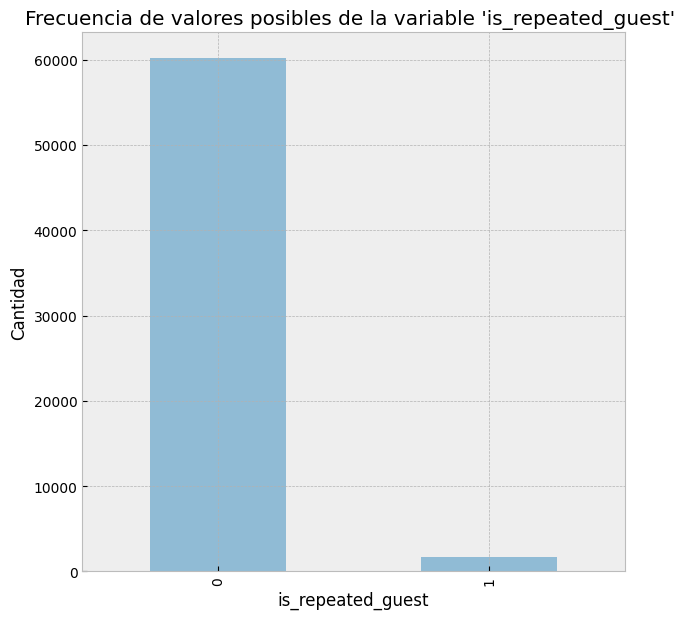

In [ ]:
nombre_columna = 'is_repeated_guest'
hoteles_train[nombre_columna].value_counts().plot.bar(alpha=0.5 , title=f"Frecuencia de valores posibles de la variable '{nombre_columna}' " , xlabel=nombre_columna , ylabel="Cantidad")

<Axes: title={'center': "Frecuencia de valores posibles de la variable 'reserved_room_type' "}, xlabel='reserved_room_type', ylabel='Cantidad'>

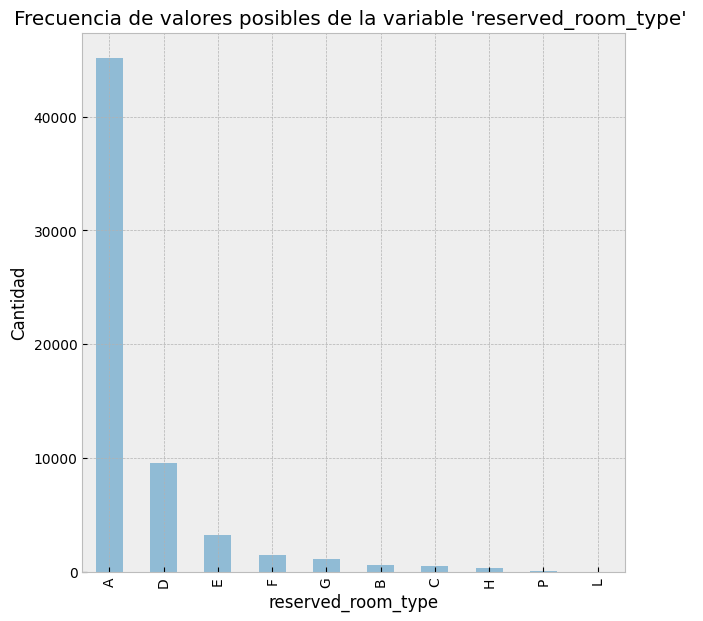

In [ ]:
nombre_columna = 'reserved_room_type'
hoteles_train[nombre_columna].value_counts().plot.bar(alpha=0.5 , title=f"Frecuencia de valores posibles de la variable '{nombre_columna}' " , xlabel=nombre_columna , ylabel="Cantidad")

<Axes: title={'center': "Frecuencia de valores posibles de la variable 'assigned_room_type' "}, xlabel='assigned_room_type', ylabel='Cantidad'>

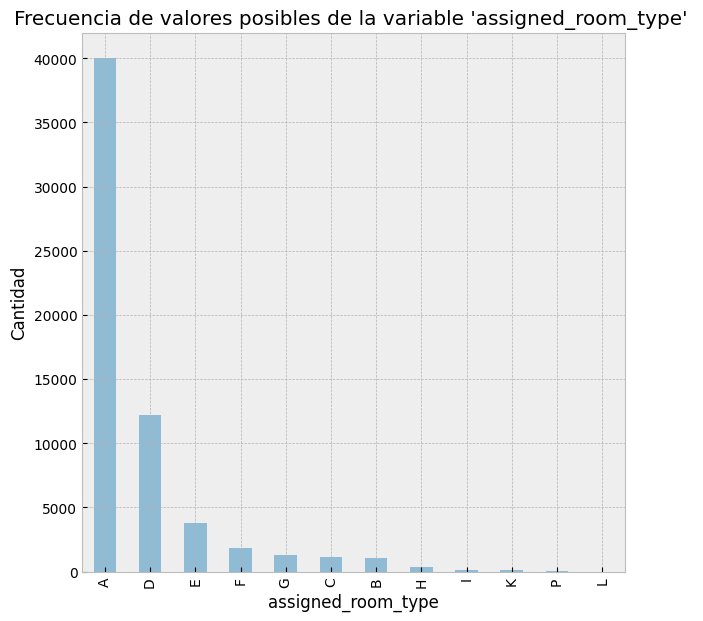

In [ ]:
nombre_columna = 'assigned_room_type'
hoteles_train[nombre_columna].value_counts().plot.bar(alpha=0.5 , title=f"Frecuencia de valores posibles de la variable '{nombre_columna}' " , xlabel=nombre_columna , ylabel="Cantidad")

<Axes: title={'center': "Frecuencia de valores posibles de la variable 'deposit_type' "}, xlabel='deposit_type', ylabel='Cantidad'>

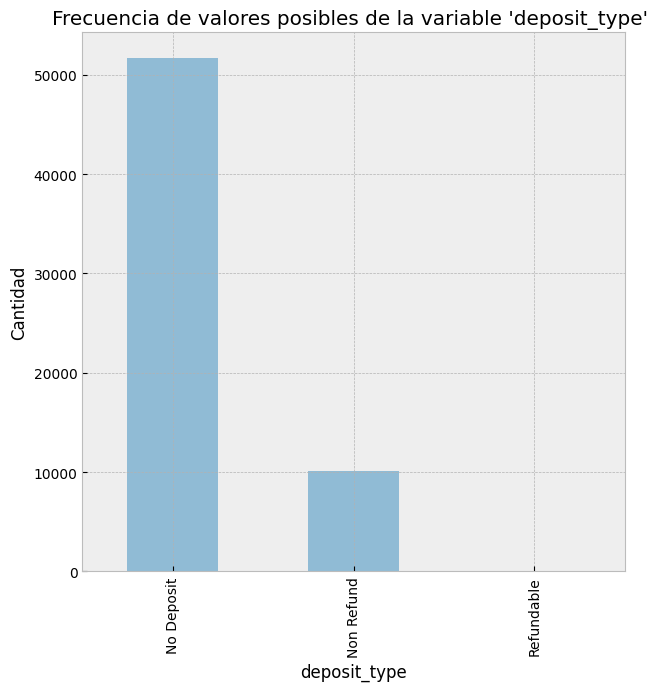

In [ ]:
nombre_columna = 'deposit_type'
hoteles_train[nombre_columna].value_counts().plot.bar(alpha=0.5 , title=f"Frecuencia de valores posibles de la variable '{nombre_columna}' " , xlabel=nombre_columna , ylabel="Cantidad")

<Axes: title={'center': "Frecuencia de valores posibles de la variable 'customer_type' "}, xlabel='customer_type', ylabel='Cantidad'>

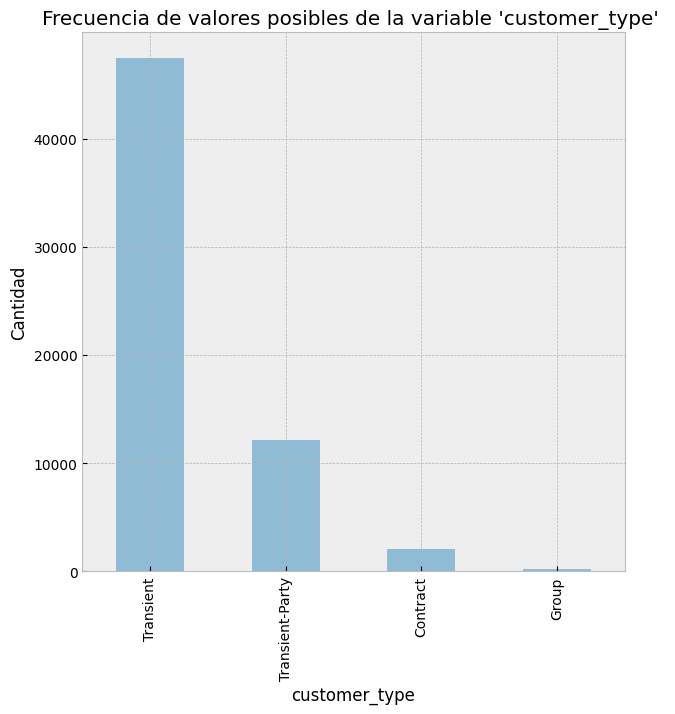

In [ ]:
nombre_columna = 'customer_type'
hoteles_train[nombre_columna].value_counts().plot.bar(alpha=0.5 , title=f"Frecuencia de valores posibles de la variable '{nombre_columna}' " , xlabel=nombre_columna , ylabel="Cantidad")

<Axes: title={'center': "Frecuencia de valores posibles de la variable 'is_canceled' "}, xlabel='is_canceled', ylabel='Cantidad'>

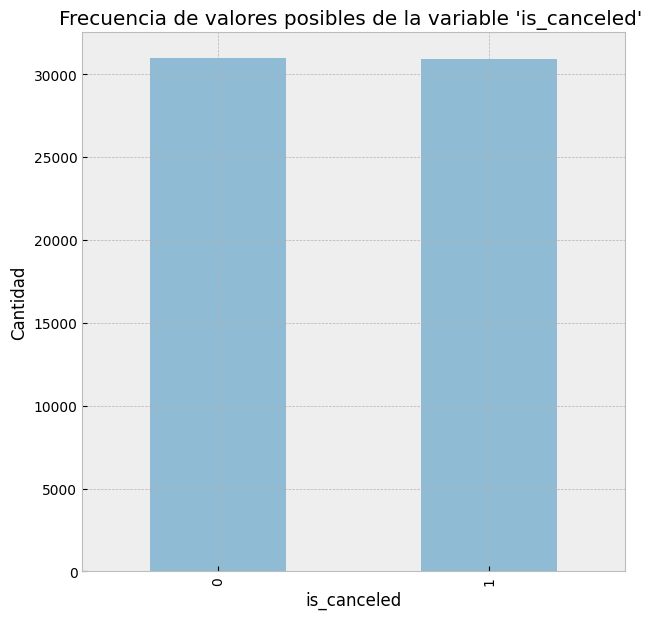

In [ ]:
nombre_columna = 'is_canceled'
hoteles_train[nombre_columna].value_counts().plot.bar(alpha=0.5 , title=f"Frecuencia de valores posibles de la variable '{nombre_columna}' " , xlabel=nombre_columna , ylabel="Cantidad")

Para la columna agent que representa el id del vendedor, tenemos mas de 200 agentes distintos, a continuación un gráfico de los 10 vendedores que mas reservas vendieron.

In [ ]:
print('Cantidad de valores únicos de la columna agent:')
hoteles_train['agent'].nunique()

Cantidad de valores únicos de la columna agent:


296

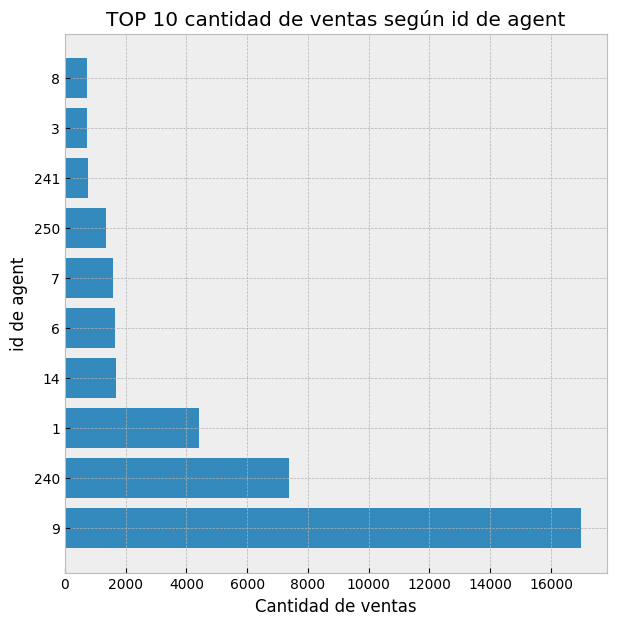

In [ ]:
nombre_var = "agent"
agent_top10 = hoteles_train[nombre_var].value_counts().head(10)

def getID(x):
  return str(int(x))

eje_y = list(map(getID, agent_top10.index.tolist()))
eje_x = agent_top10.tolist()


plt.style.use("bmh")
plt.barh(eje_y, eje_x)

plt.ylabel('id de agent')
plt.xlabel('Cantidad de ventas')
plt.title("TOP 10 cantidad de ventas según id de agent")

plt.show()


Sucede lo mismo con la columna company:

In [ ]:
nombre_var = "company"
print('Cantidad de valores únicos de la columna company:')
hoteles_train[nombre_var].nunique()

Cantidad de valores únicos de la columna company:


276

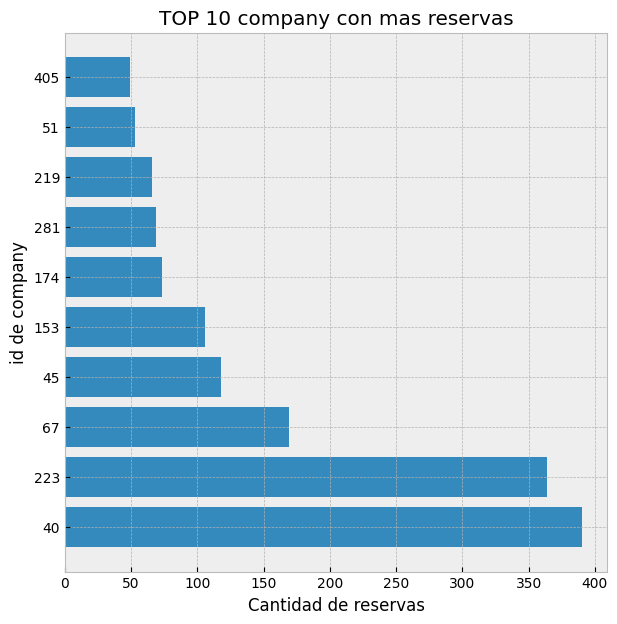

In [ ]:

company_top10 = hoteles_train['company'].value_counts().head(10)

def getID(x):
  return str(int(x))

eje_y = list(map(getID, company_top10.index.tolist()))
eje_x = company_top10.tolist()

plt.style.use("bmh")
plt.barh(eje_y, eje_x)

plt.ylabel('id de company')
plt.xlabel('Cantidad de reservas')
plt.title("TOP 10 company con mas reservas")

plt.show()

#Analizamos datos faltantes y variables irrelevantes del dataset



##Datos faltantes

---
Primero creamos una copia del dataframe original, aquí guardaremos una copia del dataframe luego de realizar la limpieza de datos

In [ ]:
df_hoteles_train_copy_1 = hoteles_train.copy()

---
Analizamos el porcentaje de datos nulos de las columnas que tienen nulos:



In [ ]:

filas_totales=df_hoteles_train_copy_1.shape[0]

# Creamos un DataFrame vacío para filtrar los resultados
df_filtered = pd.DataFrame(columns=["Columnas", "% de nulos"])

# Iteramos a través de las columnas de df_hoteles_train_copy_1
for columna in df_hoteles_train_copy_1.columns:
    porcentaje_nulos = (df_hoteles_train_copy_1[columna].isna().sum() + len(df_hoteles_train_copy_1[df_hoteles_train_copy_1[columna]=='Undefined'])) / filas_totales * 100
    cantidad_nulos = (df_hoteles_train_copy_1[columna].isna().sum() + len(df_hoteles_train_copy_1[df_hoteles_train_copy_1[columna]=='Undefined']))
    df_filtered = pd.concat([df_filtered, pd.DataFrame({"Columnas": [columna], "% de nulos": [porcentaje_nulos], "Cantidad": cantidad_nulos})], ignore_index=True)

df_filtered = df_filtered[df_filtered['% de nulos'] != 0]
df_filtered.sort_values('% de nulos', ascending = False)


,Columnas,% de nulos,Cantidad
23,company,94.908985,58761.0
22,agent,12.743689,7890.0
11,meal,0.954565,591.0
12,country,0.356952,221.0
9,children,0.006461,4.0
14,distribution_channel,0.006461,4.0
13,market_segment,0.003230,2.0


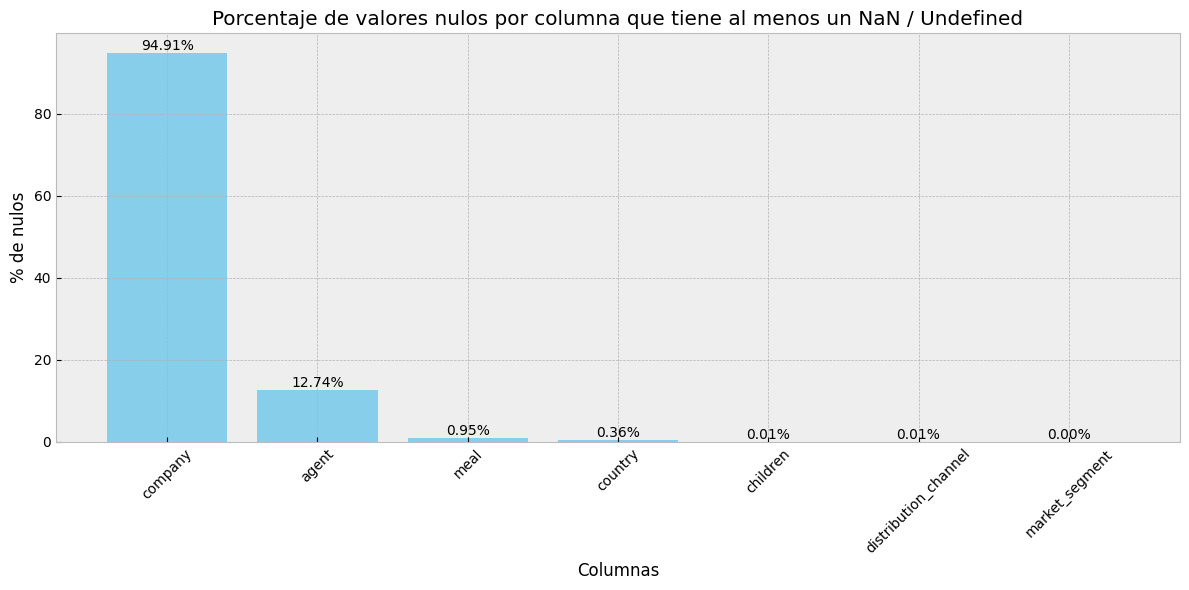

In [ ]:
# Creamos el gráfico de barras
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura

# Ordenamos el DataFrame por el porcentaje de nulos de forma descendente
df_filtered_sorted = df_filtered.sort_values(by="% de nulos", ascending=False)

# Filtramos solo las filas con porcentaje de nulos diferente de 0
df_filtered_sorted = df_filtered_sorted[df_filtered_sorted["% de nulos"] != 0]

# Creamos el gráfico de barras
bars = plt.bar(df_filtered_sorted["Columnas"], df_filtered_sorted["% de nulos"], color='skyblue')

# Etiquetas y títulos
plt.xlabel("Columnas")
plt.ylabel("% de nulos")
plt.title("Porcentaje de valores nulos por columna que tiene al menos un NaN / Undefined")

# Rotamos las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Agregamos etiquetas de valores en la parte superior de las barras con valores diferentes de 0
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

# Mostrar el gráfico
plt.tight_layout()  # Ajusta el espacio para evitar recorte de etiquetas
plt.show()

<h1>Company</h1>

La variable company tiene un 94,91% de datos faltantes, realizamos observaciones de si tiene correlación con el target is_canceled:

In [ ]:
df_company_fna = hoteles_train[['is_canceled','company']].copy()

Text(0.5, 1.0, 'Scatterplot entre las variables is_canceled y company')

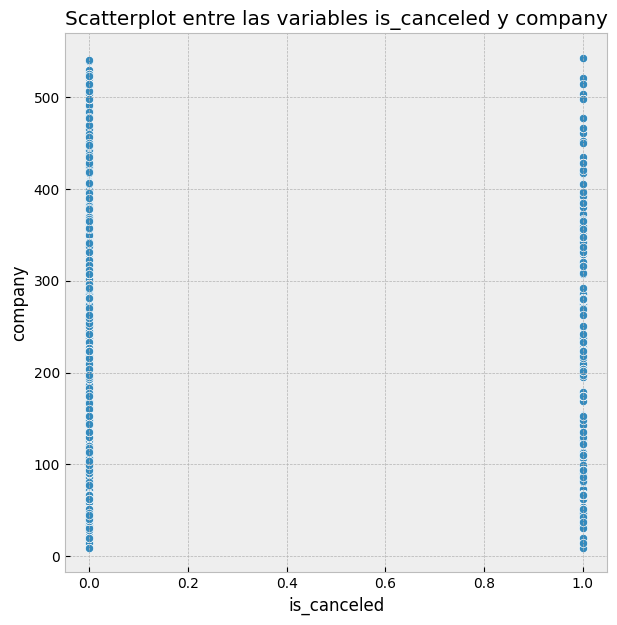

In [ ]:
sns.scatterplot(df_company_fna, x='is_canceled', y='company')
plt.title("Scatterplot entre las variables is_canceled y company")

Text(0.5, 1.0, 'Matriz de correlación entre las variables is_canceled y company')

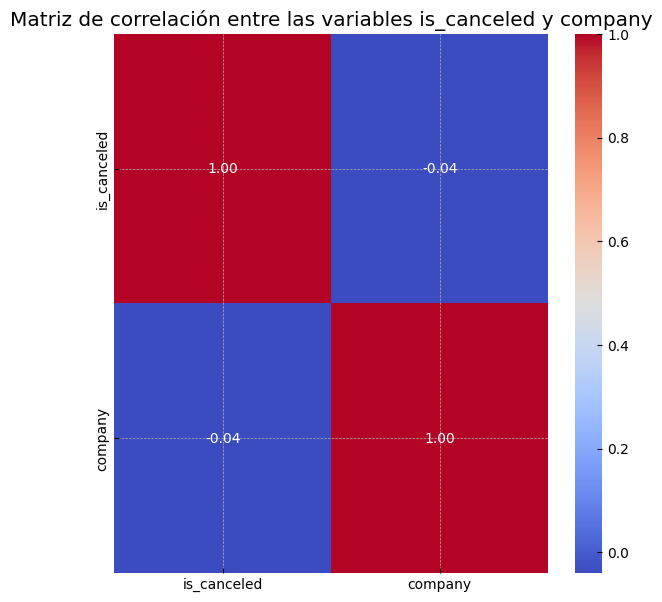

In [ ]:
sns.heatmap(df_company_fna.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre las variables is_canceled y company")

No encontramos correlación entre is_canceled y company, ya que no hay correlación y gran parte de sus datos no estan presentes procedemos a eliminarla del dataset en la sección **Limpieza**.

##Otras variables irrelevantes

Otra variable que encontramos irrelevante es la columna **id** ya que es un id único para cada fila y no es necesario para el análisis de datos.

##Limpieza

Ahora hacemos una limpieza en los datos, según los siguientes criterios:
1. Eliminamos la columna **company**, ya que no tenemos el 95% de sus datos y además no tiene ninguna relación significativa con la variable target is_canceled<br>
2. Reemplazar en columna **children** los NaN por el valor de la moda <br>
3. Reemplazar en columna **agent** los NaN por el valor de la moda <br>
4. Reemplazar en la columna **country** los NaN por el valor de la moda <br>
5. Reemplazar en la columna **meal** el valor 'Undefined' por 'SC' ya que según el paper representan el mismo valor <br>
6. Eliminamos las filas que tienen valor 'Undefined' en la columna **distribution_channel** ya que representan solo 0,01% de las filas. <br>
7. Eliminamos las filas que tienen valor 'Undefined' en la columna **market_segment** ya que representan menos del 0,01% de las filas. <br>
8. Eliminamos la columna **id**. <br>

In [ ]:
#Antes de la limpieza e imputación de valores

# Imprimo los valores únicos de las columnas
print("Valores únicos en la columna 'company':")
print(hoteles_train["company"].unique())

print("\nValores únicos en la columna 'children':")
print(hoteles_train["children"].unique())

print("\nValores únicos en la columna 'agent':")
print(hoteles_train["agent"].unique())

print("\nValores únicos en la columna 'country':")
print(hoteles_train["country"].unique())

print("\nValores únicos en la columna 'meal':")
print(hoteles_train["meal"].unique())

print("\nValores únicos en la columna 'distribution_channel':")
print(hoteles_train["distribution_channel"].unique())

print("\nValores únicos en la columna 'market_segment':")
print(hoteles_train["market_segment"].unique())

Valores únicos en la columna 'company':
[ nan 223. 512. 218. 233. 268. 385.  88. 154.  51. 281. 202.  67. 405.
  45. 329.  46. 197. 137. 366. 174.  40. 144. 227.  86. 159. 477. 308.
  43. 219.  68. 407.  81. 465. 343. 466. 353. 424. 485.  38.  94. 153.
  72.  20.  47. 286. 195. 358. 277. 355.  12. 498. 278.  62. 393. 238.
 242. 143. 135. 331. 400. 342. 110. 313.  78. 348. 209. 452.  99. 250.
 118. 507. 397. 321. 113. 167.   9. 204. 280.  83. 203. 333. 365. 186.
 324. 169. 496.  31. 382. 270.  84. 245. 274. 215. 418. 525. 290.  39.
  14. 150. 251. 292.  91. 230. 521. 320. 334. 408. 207. 122. 178.  82.
 388. 360. 148. 183.  22. 435. 420. 523. 307. 319.  49. 421. 380.  54.
 221. 282.  48. 200. 126. 216. 338. 379. 356. 461. 543. 220. 371. 105.
 311. 346. 269. 168. 372. 399. 120.  37. 115. 291. 127. 515. 439.  73.
 428. 179. 383. 112. 284. 297. 499.  92. 234. 317. 396. 103. 140. 409.
 445. 109. 240. 378. 271.  18. 384.  59. 376. 458. 272. 369. 107. 504.
 528. 377. 149. 490. 163. 337. 370. 4

In [ ]:
#Hacemos la limpieza (SOBRE LA COPIA DEL DATAFRAME!!!!)
df_hoteles_train_copy_1 = df_hoteles_train_copy_1.drop(["company", "id"], axis=1)

moda_children = pd.Series(df_hoteles_train_copy_1['children'].values.flatten()).mode()[0]
moda_agent = pd.Series(df_hoteles_train_copy_1['agent'].values.flatten()).mode()[0]

df_hoteles_train_copy_1["children"] = df_hoteles_train_copy_1["children"].fillna(moda_children)
df_hoteles_train_copy_1["agent"] = df_hoteles_train_copy_1["agent"].fillna(moda_agent)
df_hoteles_train_copy_1["country"] = df_hoteles_train_copy_1["country"].fillna("NULL")
df_hoteles_train_copy_1['meal'].replace('Undefined', 'SC', inplace = True)
df_hoteles_train_copy_1.drop(df_hoteles_train_copy_1[df_hoteles_train_copy_1['distribution_channel'] == 'Undefined'].index, inplace = True)
df_hoteles_train_copy_1.drop(df_hoteles_train_copy_1[df_hoteles_train_copy_1['market_segment'] == 'Undefined'].index, inplace = True)

In [ ]:
#Post de la limpieza e imputación de valores

# Imprimo los valores únicos de las columnas (con la columna "company" eliminada)

print("\nValores únicos en la columna 'children':")
print(df_hoteles_train_copy_1["children"].unique())

print("\nValores únicos en la columna 'agent':")
print(df_hoteles_train_copy_1["agent"].unique())

print("\nValores únicos en la columna 'country':")
print(df_hoteles_train_copy_1["country"].unique())

print("\nValores únicos en la columna 'meal':")
print(df_hoteles_train_copy_1["meal"].unique())

print("\nValores únicos en la columna 'distribution_channel':")
print(df_hoteles_train_copy_1["distribution_channel"].unique())

print("\nValores únicos en la columna 'market_segment':")
print(df_hoteles_train_copy_1["market_segment"].unique())


Valores únicos en la columna 'children':
[ 0.  2.  1.  3. 10.]

Valores únicos en la columna 'agent':
[  9. 154.  20. 314. 240.  58. 250.  86. 229.   1.  33.   8.   3. 236.
 177.  38.  39. 170. 410.  85.  26.  96.  14. 134.  56. 234. 468. 254.
 147.  34. 138.  40.  29. 315.  37. 195. 326.  35. 208.  22.  17. 296.
  28.   6.  19.  98.  83. 298.  27. 378. 484.   7.  16.  21. 175. 171.
 243.  41.  45.  11. 157. 273.  12. 387. 368. 434.   5.  36. 436. 405.
 191. 257.  95.  15.  31. 440.  50. 241.   4.  67.  63. 168.  44. 261.
 281.  94. 336.  30. 420. 104. 121. 464. 196. 142. 151. 242. 119. 339.
 310. 531. 305.   2.  53.  64. 248. 313. 364. 286. 459. 133. 132. 245.
 143.  52. 155. 251. 223. 156. 159. 185. 323.  13. 330. 359. 527. 103.
  68. 174.  82.  42. 256. 483. 146.  89. 252. 220.  88. 303. 181. 152.
  24. 394.  75. 306. 183.  69.  10. 184. 149. 162. 139.  99. 418.  71.
 481. 493. 360. 115. 334.  47. 375. 341. 354. 214. 350.  87.  78. 126.
  79. 348.  60. 332. 430. 474. 495. 163. 112.

<b> <i> Entonces hemos realizado la limpieza de las siguientes 6 columnas: </i>
</b>
* country
* children
* agent
* meal
* distribution_channel
* market_segment

<b> <i> Y además eliminamos las columnas "id" y "company"  </i>
</b>


---
Vamos a fusionar las variables de tipo arrival_date en una sola variable

In [ ]:
# Crear una nueva columna 'arrival_date' combinando las variables con el número de semana
df_hoteles_train_copy_1['arrival_date'] = pd.to_datetime(df_hoteles_train_copy_1['arrival_date_year'].astype(str) + '-' + df_hoteles_train_copy_1['arrival_date_month'] + '-' + df_hoteles_train_copy_1['arrival_date_day_of_month'].astype(str), format='%Y-%B-%d')
df_hoteles_train_copy_1['arrival_date'] = df_hoteles_train_copy_1['arrival_date'] + pd.to_timedelta((df_hoteles_train_copy_1['arrival_date_week_number'] - 1) * 7, unit='D')

#Borramos las columnas arrival_date_year; arrival_date_month; arrival_date_day_of_month
df_hoteles_train_copy_1 = df_hoteles_train_copy_1.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis=1)


# Resultado: Una nueva columna 'arrival_date' que contiene la fecha en formato datetime con el número de semana
#print(df_hoteles_train_copy_1)
df_hoteles_train_copy_1['arrival_date']

0       2017-05-15
1       2016-08-27
2       2017-07-27
3       2017-11-27
4       2017-06-04
           ...    
61908   2017-02-17
61909   2017-05-05
61910   2017-09-11
61911   2016-07-16
61912   2016-08-07
Name: arrival_date, Length: 61909, dtype: datetime64[ns]

---
Cantidad de filas y columnas

> Antes de la limpieza:









In [ ]:
hoteles_train.shape

(61913, 31)

>   Después de la limpieza:

In [ ]:
df_hoteles_train_copy_1.shape

(61909, 27)

---
#Analisis entre variables

## Entre variables cuantitativas

Realizamos una primera observación a través de un pairplot, para ver la distribución de valores de las variables cuantitativas respecto de otras cuantitativas:

In [ ]:
sns.pairplot(df_hoteles_train_copy_1)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Vamos a utilizar la matriz de correlación para analizar correlacion entre variables numéricas (continuas):


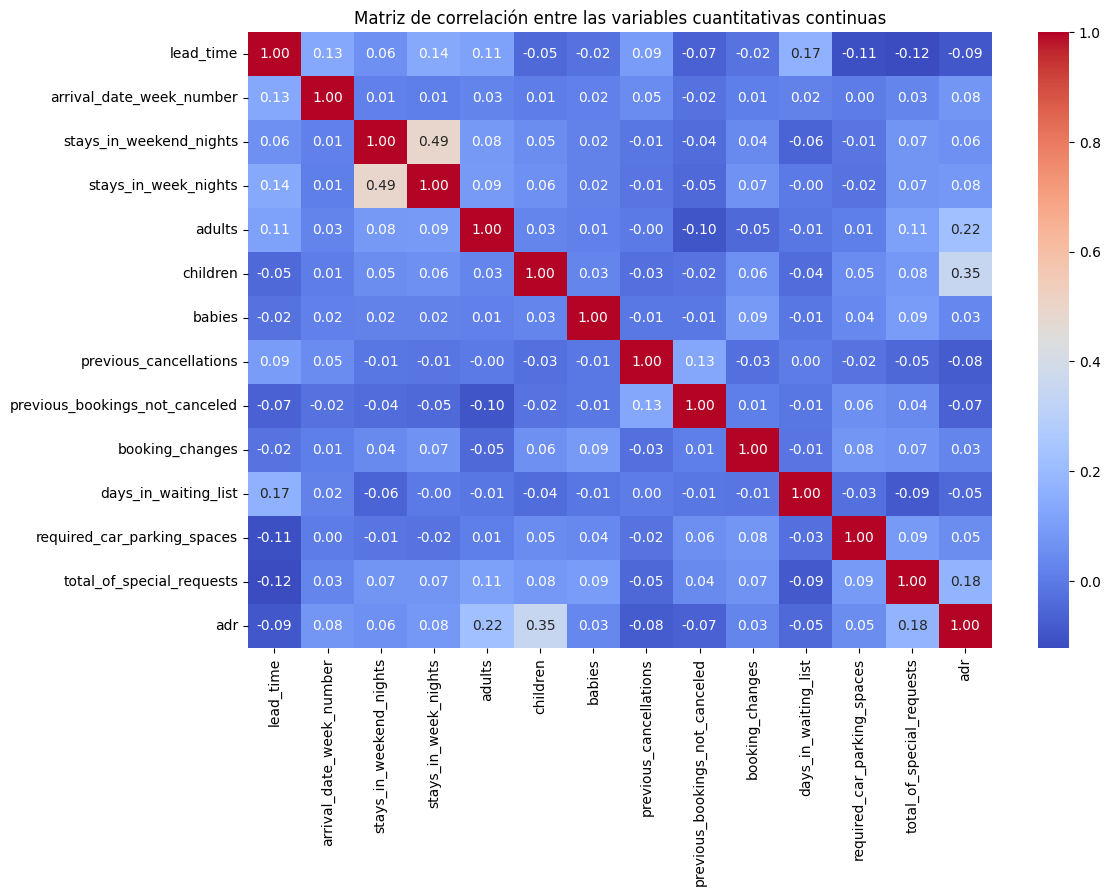

In [ ]:
# Lista de variables cuantitativas numéricas CONTINUAS
vars_cuantitativas_numericas_continuas = ['lead_time', 'arrival_date_week_number',
                      'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
                      'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
                      'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests', 'adr']

# Calcular la matriz de correlación
correlation_matrix = df_hoteles_train_copy_1[vars_cuantitativas_numericas_continuas].corr()

# Crear un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre las variables cuantitativas continuas")
plt.show()


Podemos ver que las correlaciones entre las variables numéricas continuas más importantes son:

- <b>"children"</b> se correlaciona positivamente con <b>"adr"</b> <br>
- <b>"adult"</b> se correlaciona positivamente con <b>"adr"</b>

----
## Entre variables cuantitativas y cualitativas binarias


<h2><u> ### documentacion coeficiente de punto-biserie ###</u></h2>

<i>
-<b><u>Valor del coeficiente:</u></b>  El coeficiente de punto-biserial puede variar en el rango de -1 a 1:

i) Un valor cercano a -1 indica una correlación negativa fuerte, lo que significa que a medida que los valores de la variable continua aumentan, la probabilidad de que la variable binaria sea 1 disminuye significativamente.

ii) Un valor cercano a 1 indica una correlación positiva fuerte, lo que significa que a medida que los valores de la variable continua aumentan, la probabilidad de que la variable binaria sea 1 aumenta significativamente.

iii) Un valor cercano a 0 indica una falta de relación lineal entre las dos variables.

-<b><u>Signo del coeficiente </u> </b>: El signo del coeficiente indica la dirección de la correlación. Un coeficiente positivo significa que a medida que la variable continua aumenta, la probabilidad de que la variable binaria sea 1 también aumenta, mientras que un coeficiente negativo significa que a medida que la variable continua aumenta, la probabilidad de que la variable binaria sea 1 disminuye.

-<b><u>Magnitud de la correlación</u></b>: La magnitud del coeficiente indica la fuerza de la relación. Cuanto más cercano esté el valor absoluto del coeficiente a 1, más fuerte será la correlación. Valores cercanos a 0 indican una correlación débil o nula.
</i>

<h2><u> ########################################</u></h2>

Vamos a utilizar el coeficiente de punto-biserie para analizar la correlacion entre variables numéricas binarias y variables numéricas continuas.

In [ ]:
from scipy import stats

# Variables binarias
binary_variables = ['is_canceled', 'is_repeated_guest']

var_fecha=['arrival_date'] #para poder ver los graficos, saque esta variable

vars_cuantitativas_numericas_continuas = ['lead_time', 'arrival_date_week_number', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
                      'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
                      'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests', 'adr']

# Calcular la correlación punto-biserie para cada variable cuantitativa continua con ambas variables binarias
for binary_variable in binary_variables:
    print(f"Correlación con {binary_variable}:")
    for continuous_variable in vars_cuantitativas_numericas_continuas:
        corr = stats.pointbiserialr(df_hoteles_train_copy_1[binary_variable],df_hoteles_train_copy_1[continuous_variable])
        print(f"{continuous_variable}: {corr.correlation:.3f} (p-value: {corr.pvalue:.6f})")
    print("\n")

Correlación con is_canceled:
lead_time: 0.294 (p-value: 0.000000)
arrival_date_week_number: 0.008 (p-value: 0.038122)
stays_in_weekend_nights: 0.001 (p-value: 0.748134)
stays_in_week_nights: 0.028 (p-value: 0.000000)
adults: 0.060 (p-value: 0.000000)
children: 0.006 (p-value: 0.120407)
babies: -0.032 (p-value: 0.000000)
previous_cancellations: 0.100 (p-value: 0.000000)
previous_bookings_not_canceled: -0.066 (p-value: 0.000000)
booking_changes: -0.159 (p-value: 0.000000)
days_in_waiting_list: 0.051 (p-value: 0.000000)
required_car_parking_spaces: -0.226 (p-value: 0.000000)
total_of_special_requests: -0.245 (p-value: 0.000000)
adr: 0.049 (p-value: 0.000000)


Correlación con is_repeated_guest:
lead_time: -0.108 (p-value: 0.000000)
arrival_date_week_number: -0.022 (p-value: 0.000000)
stays_in_weekend_nights: -0.080 (p-value: 0.000000)
stays_in_week_nights: -0.088 (p-value: 0.000000)
adults: -0.129 (p-value: 0.000000)
children: -0.030 (p-value: 0.000000)
babies: -0.009 (p-value: 0.026354)


Se puede ver que los coeficientes de correlacion punto-biserie entre is_canceled y el resto de las variables cuantitativas continuas, en general demuestran que la correlacion es muy debil ó debil para aquellos que el coeficiente vale aproximadamente 0.2 o -0.2.

Por otro lado, respecto de la variable is_repeated_guest, se puede ver que con la variable previous_bookings_not_canceled tienen una correlacion medianamente fuerte, mientras que con el resto las correlaciones son muy debiles o casi nulas.

---

## Entre variables cuantitativas y cualitativas no binarias

Analizamos las variables cuantitativas con las categóricas con más de 2 valores únicos:

In [ ]:
var_fecha=['arrival_date']
vars_cuantitativas_numericas_continuas = ['lead_time', 'arrival_date_week_number',
                      'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
                      'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
                      'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests', 'adr']

vars_cualitativas_mul_categorias = ['hotel','meal','market_segment','distribution_channel',
                                    'reserved_room_type','assigned_room_type','deposit_type','customer_type']



In [ ]:
for nombre_cuantitativa in vars_cuantitativas_numericas_continuas:
  fig, axs = plt.subplots(3, 3,figsize=(12,10))

  x = 0
  y = 0
  for nombre_var in vars_cualitativas_mul_categorias:
    if x > 2 :
      x = 0
      y+=1
    sns.boxplot(ax=axs[x,y],data=df_hoteles_train_copy_1, x=nombre_cuantitativa, y=nombre_var)
    x+=1

  fig.suptitle(f'Análisis entre {nombre_cuantitativa} y variables cualitiativas')
  fig.tight_layout(pad=2.0)
  fig.show()

Output hidden; open in https://colab.research.google.com to view.

Algunas observaciones que podemos tomar del análisis:


*   Las reservas hechas por grupos suelen hacerse con menos anticipación como podemos ver en el boxplot (lead_time x customer_type)
*   Durante el año 2015 la mayoría de los depósitos eran sin reembolso como podemos ver en el boxplot (arrival_date_year x deposit_type)
*   El tipo de habitación P solo se empezó a reservar a partir del 2016 y el tipo de habitación L solo durante 2015 como podemos ver en el boxplot (arrival_date_year x reserved_room_type)
*   Los reembolsos de las reservas se dan en su gran mayoría en la segunda quincena del mes como podemos ver en el boxplot (arrival_date_day_of_month x deposit_Type)
*   El tipo de habitación usadas por un grupo de mas de 10 personas son A, D y E como podemos ver en el boxplot (reserved_room_type x adults)
*   Las reservas con muchas cancelaciones previas suelen reservar la habitación tipo A (reserved_room_type x previous_cancellations)
*   Las reservas con muchas reservas previas sin cancelar suelen pedir el meal del tipo 'BB' y venir del segmento corporate (previous_booking_not_cancelled x meal) y (previous_booking_not_cancelled x distribution_channel)



## Entre variables cualitativas

Se podría aplicar el método de chi-square, y el coeficiente de Cramer para esto.
Se podría armar un dataframe, para visualizar el p-value y el Cramer's Value por variable categórica en relación de las otras

Text(0.5, 1.0, 'Coeficiente de Cramer entre variables cualitativas')

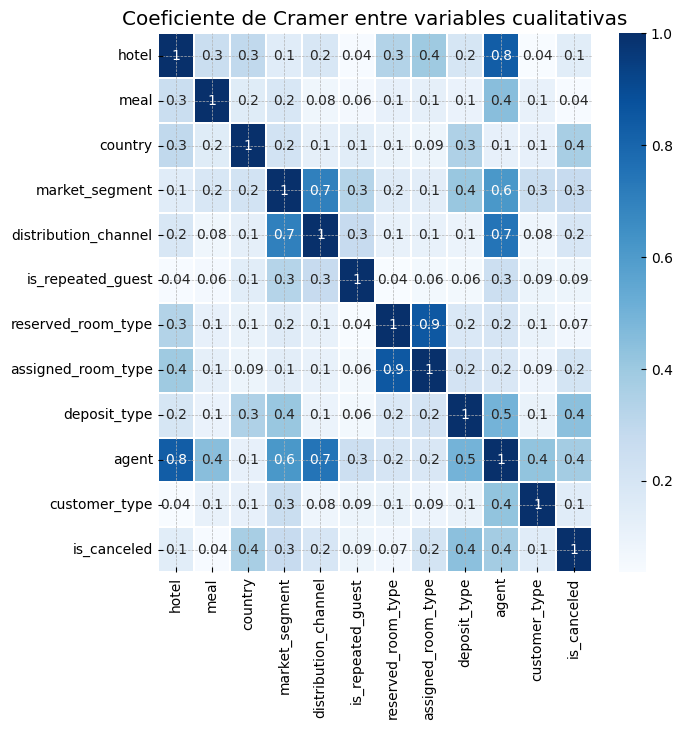

In [ ]:
# Lista de variables categóricas
vars_cualitativas = [ 'hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest',
                     'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'customer_type', 'is_canceled']

# Crear un DataFrame para almacenar los p-values y los coeficientes de Cramer
results_df = pd.DataFrame()

# Calcular chi-cuadrado y coeficientes de Cramer para todas las combinaciones
for var1 in vars_cualitativas:
    for var2 in vars_cualitativas:
            contingency_table = pd.crosstab(df_hoteles_train_copy_1[var1], df_hoteles_train_copy_1[var2])
            chi2, p, _, _ = chi2_contingency(contingency_table)
            n = contingency_table.sum().sum()
            min_dim = min(contingency_table.shape)
            cramer_v = np.sqrt(chi2 / (n * (min_dim - 1)))
            results_df.at[var1, var2] = float(cramer_v)

# Mostrar el DataFrame
results_df
sns.heatmap(results_df,cmap='Blues', fmt='.1g', linewidths = 0.30, annot = True)
plt.title('Coeficiente de Cramer entre variables cualitativas')

El coeficiente de cramer nos habla sobre la fuerza de relación


Analizamos también el p-value:

Text(0.5, 1.0, 'p-value entre variables cualitativas')

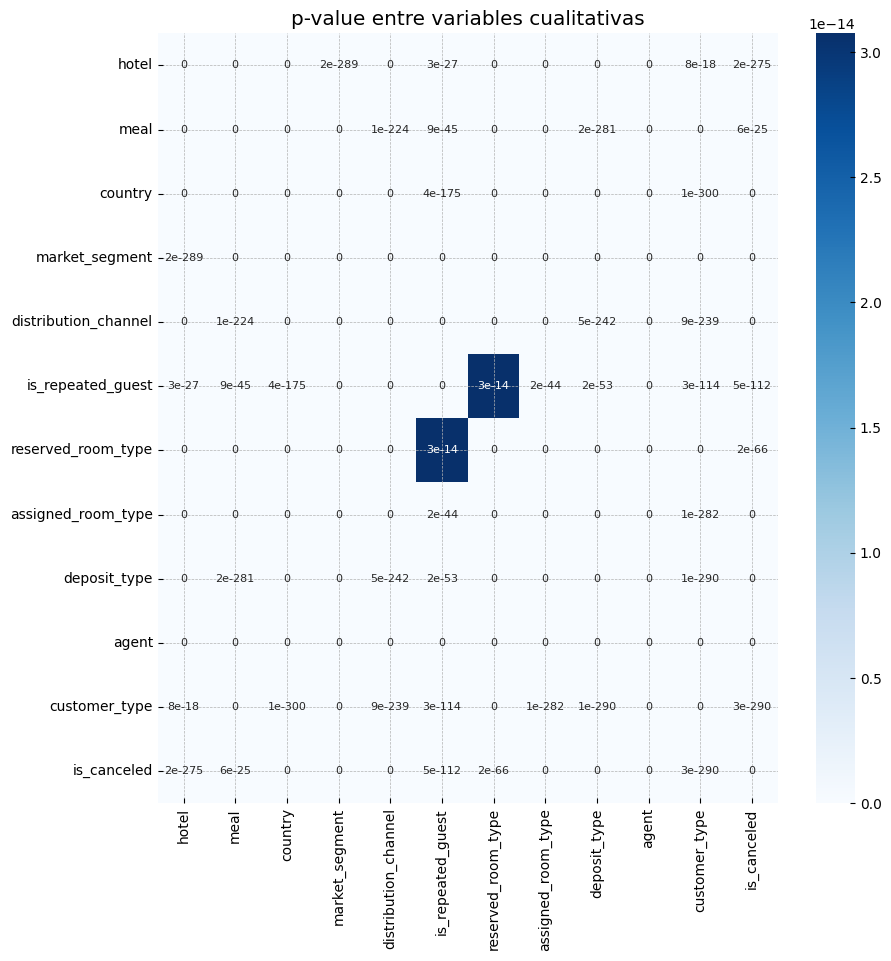

In [ ]:
plt.figure(figsize=(10, 10))
# Lista de variables categóricas
vars_cualitativas = [ 'hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest',
                     'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'customer_type', 'is_canceled']

# Crear un DataFrame para almacenar los p-values y los coeficientes de Cramer
results_df = pd.DataFrame()

# Calcular chi-cuadrado y coeficientes de Cramer para todas las combinaciones
for var1 in vars_cualitativas:
    for var2 in vars_cualitativas:
        #if var1 != var2:
            contingency_table = pd.crosstab(df_hoteles_train_copy_1[var1], df_hoteles_train_copy_1[var2])
            chi2, p, _, _ = chi2_contingency(contingency_table)
            n = contingency_table.sum().sum()
            min_dim = min(contingency_table.shape)
            cramer_v = np.sqrt(chi2 / (n * (min_dim - 1)))
            #results_df.at[var1, var2] = f"p-value: {p:.8f}, Cramer's V: {cramer_v:.8f}"
            results_df.at[var1, var2] = float(p)

# Mostrar el DataFrame
#print(results_df)
results_df
sns.heatmap(results_df,cmap='Blues', fmt='.1g', annot = True, annot_kws={"fontsize":8})
plt.title('p-value entre variables cualitativas')

Entonces el análisis que podemos decir es que en general los p-values son muy cercanos a cero, lo cual hace que podamos rechazar la hipótesis nula de independencia de relacion entre variables, y confirmar la asociación entre las variables de alguna u otra manera.

Por otro lado, podemos ver que:

-Agent se correlaciona fuertemente con hotel,market_segment,distribution_channel, y despues de manera mas moderada con deposit_type, customer_type y is_canceled.

-is_canceled se correlaciona moderadamente con country,deposit_type y agent.

-Distribution_channel se correlaciona fuertemente con market_segment.


---

## Relación entre variables cuantitativas y el target

<h2> <u>Analizamos las variables numéricas que se correlacionan considerablemente con el target según el coeficiente de correlacion punto-biserie calculado anteriormente: </u></h2>

<i>Nota: las variables que más se correlacionan con la variable target, son aquellas que influyen mucho más que las otras variables a la hora de una reserva sea cancelada, o no. </i>

-**"lead_time"** :  las reservas que se realizan con mayor anticipación tienen una tendencia a ser menos propensas a la cancelación, y esto se expresa por la correlacion positiva de 0.29 (coeficiente de punto-biserie).

-**"required_car_parking_spaces"**: a medida que la cantidad de cocheras pedidas aumenta, la probabilidad de que una reserva sea cancelada tiende a disminuir en cierta medida, y esto se expresa por la correlacion negativa de -0.23 (coeficiente de punto-biserie).

-**"total_of_special_requests"**: A medida que la cantidad de pedidos especiales del cliente  aumenta, la probabilidad de que la reserva sea cancelada tiende a aumentar. Esto se refleja en la correlación negativa de -0.24 (coeficiente de punto-biserie).

<ipython-input-23-43cd23d9494f>:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, percentage in row.iteritems():


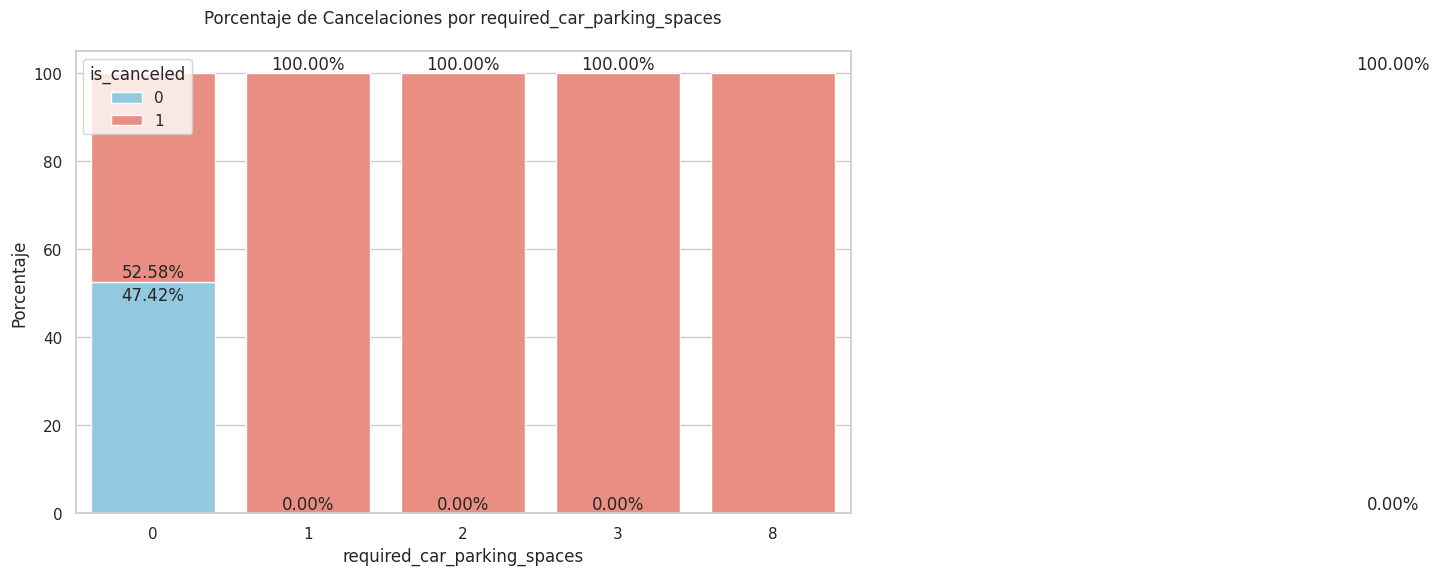

<ipython-input-23-43cd23d9494f>:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, percentage in row.iteritems():


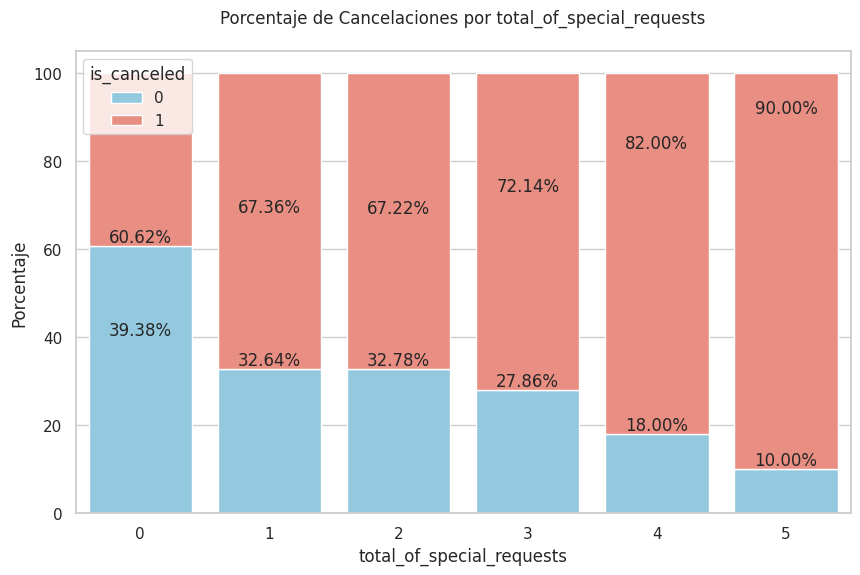

In [ ]:
# Lista de variables para analizar
variables = ["required_car_parking_spaces", "total_of_special_requests"]

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear un gráfico de barras apiladas para cada variable
for var in variables:
    # Calcular los porcentajes de 0 y 1 para cada valor de la variable
    percentage_cancelled = df_hoteles_train_copy_1.groupby(var)['is_canceled'].mean() * 100
    percentage_not_cancelled = 100 - percentage_cancelled

    # Crear un DataFrame para los porcentajes
    percentage_df = pd.DataFrame({'0': percentage_not_cancelled, '1': percentage_cancelled})

    # Crear el gráfico de barras apiladas
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=percentage_df, x=percentage_df.index, y='1', color='skyblue', label='0')  # Intercambiar colores aquí
    ax = sns.barplot(data=percentage_df, x=percentage_df.index, y='0', color='salmon', label='1', bottom=percentage_df['1'])  # Intercambiar colores aquí

    # Configurar etiquetas y título
    plt.xlabel(var)
    plt.ylabel('Porcentaje')
    plt.title(f'Porcentaje de Cancelaciones por {var}', pad=20)  # Ajustar el valor de "pad" para cambiar el margen del título

    # Mostrar los porcentajes encima de cada barra
    for index, row in percentage_df.iterrows():
        for col, percentage in row.iteritems():
            plt.text(index, percentage, f'{percentage:.2f}%', ha='center', va='bottom')

    # Mostrar la leyenda
    plt.legend(title='is_canceled', loc='upper left', bbox_to_anchor=(0.0, 1.0))

    # Mostrar el gráfico
    plt.show()


Podemos decir que la variable "total_of_special_requests" tiene 50% de probabilidad de cancelación por valor posible, lo cual no aporta mucho para la predicción de la variable target.

Para la variable required_car_parking_spaces podemos decir que si no se requieren lugares de estacionamiento para la reserva, entonces la probabilidad de que se cancele la reserva es de un 50%, pero si se requiere al menos 1 lugar de estacionamiento, entonces la tendencia nos dice la cancelación de la reserva es poco probable, casi nula.

Finalmente para la variable lead_time podemos ver la distribución de lead_time en funcion de las reservas canceladas, y podemos ver efectivamente que a medida de que baja el lead_time, la probabilidad de cancelamiento de la reserva disminuye, ó al revés, a medida de que aumenta el lead_time, aumenta la probabilidad de cancelamiento de la reserva.

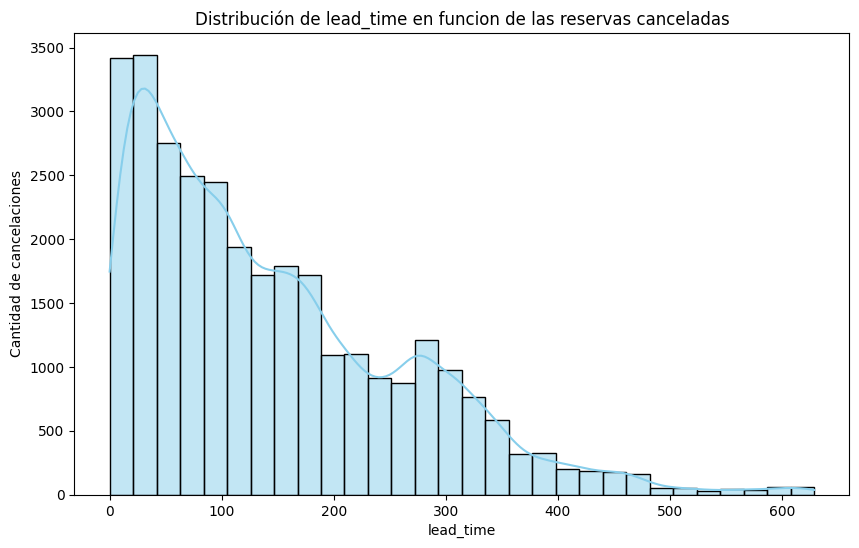

In [ ]:
# Filtrar los datos para obtener solo las reservas canceladas
cancelled_data = df_hoteles_train_copy_1[df_hoteles_train_copy_1['is_canceled'] == 1]

# Crear el histograma para "lead_time" en las reservas canceladas
plt.figure(figsize=(10, 6))
sns.histplot(cancelled_data['lead_time'], bins=30, kde=True, color='skyblue')
plt.xlabel('lead_time')
plt.ylabel('Cantidad de cancelaciones')
plt.title('Distribución de lead_time en funcion de las reservas canceladas')
plt.show()

---

##<h1> Entre variables categóricas y la variable target is_canceled</h1>

---
<h2> <u> DOCUMENTACION MÉTODO CHI-CUADRADO Y COEFICIENTE DE CRAMER </u></h2>
<h3> <b> ###<u> Método de chi-cuadrado: </u> ###</b></h3>

El método de chi-cuadrado (χ²) de contingencia <b>se utiliza para analizar la relación entre dos variables categóricas en una tabla de contingencia </b>. Este método evalúa si existe una asociación significativa o independencia entre las dos variables. Aquí hay una explicación más detallada de lo que el método de chi-cuadrado puede decirte:

Hipótesis nula (H0): La hipótesis nula en un análisis de chi-cuadrado es que no hay asociación significativa entre las dos variables categóricas. En otras palabras, las dos variables son independientes.

Hipótesis alternativa (H1): La hipótesis alternativa sugiere que hay una asociación significativa entre las dos variables categóricas. En otras palabras, las dos variables no son independientes y hay una relación entre ellas.

Estadístico de prueba (χ²): El estadístico de prueba chi-cuadrado se calcula a partir de la tabla de contingencia. Mide la diferencia entre la frecuencia observada de cada combinación de categorías y la frecuencia esperada si las dos variables fueran independientes. Un valor de chi-cuadrado grande indica una mayor discrepancia entre las observaciones y las expectativas bajo la hipótesis nula.

Grados de libertad (df): Los grados de libertad se utilizan para determinar la distribución de probabilidad del estadístico de prueba chi-cuadrado. El número de grados de libertad depende del tamaño de la tabla de contingencia y se calcula como (filas - 1) * (columnas - 1).

Valor p: El valor p es la probabilidad de obtener un estadístico de prueba chi-cuadrado igual o más extremo que el observado bajo la hipótesis nula. Si el valor p es menor que un umbral predefinido (generalmente 0.05), se rechaza la hipótesis nula en favor de la hipótesis alternativa, lo que indica que existe una asociación significativa entre las dos variables.

En resumen, el método de chi-cuadrado permite determinar si existe una relación significativa entre dos variables categóricas. Si el valor p es bajo (generalmente menor que 0.05), puedes concluir que hay una asociación significativa entre las dos variables. Si el valor p es alto, no tienes evidencia para rechazar la hipótesis nula de independencia entre las variables. Es una herramienta útil para analizar la relación entre variables categóricas en un contexto estadístico.

<h3> <b> ###<u> Coeficiente de Crámer: </u> ###</b></h3>

<b><u>Para evaluar la dirección y fuerza de la relación entre dos variables categóricas</u></b> después de haber determinado que existe una asociación significativa mediante el método de chi-cuadrado, puedes utilizar el coeficiente de Cramer (Cramer's V). El coeficiente de Cramer mide la fuerza de la asociación entre dos variables categóricas y varía en un rango de 0 a 1.

Aquí están las interpretaciones típicas del coeficiente de Cramer:

<u>Cramer's V cerca de 0</u>: Indica una asociación débil o nula entre las variables categóricas.<br>
<u>Cramer's V cercano a 1</u>: Indica una asociación fuerte entre las variables categóricas. <br>
En otras palabras, <b>cuanto más cercano esté el valor de Cramer's V a 1, más fuerte es la relación entre las dos variables</b>. El coeficiente de Cramer es especialmente útil cuando tienes una tabla de contingencia grande o cuando las frecuencias en la tabla son bajas, ya que tiene en cuenta tanto el tamaño de la tabla como las diferencias entre las categorías.


In [ ]:
from scipy.stats import chi2_contingency

# Defino la función del coeficiente de cramer (recibe la tabla de contingencia como parámetro)
def cramers_v(table):
    chi2, _, _, _ = chi2_contingency(table)
    n = table.sum().sum()
    min_dim = min(table.shape)
    v = np.sqrt(chi2 / (n * (min_dim - 1)))
    return v

# Lista de variables categóricas
variables_categoricas = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest',
                         'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'customer_type']

# Creamos un DataFrame para guardar los resultados
results_df = pd.DataFrame(columns=variables_categoricas, index=["Chi-square", "p-value", "Cramer's Coefficient"])

for var in variables_categoricas:
    contingency_table = pd.crosstab(df_hoteles_train_copy_1[var], df_hoteles_train_copy_1['is_canceled'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    v = cramers_v(contingency_table)
    results_df[var] = [chi2, p, v]

# Visualizo el dataframe
results_df

,hotel,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,agent,customer_type
Chi-square,1.257157e+03,1.158969e+02,8509.362090,4682.363211,2339.867012,5.057717e+02,3.330500e+02,2764.337589,11978.271081,8943.669814,1.340320e+03
p-value,2.310780e-275,5.901784e-25,0.000000,0.000000,0.000000,5.274513e-112,2.499329e-66,0.000000,0.000000,0.000000,2.624347e-290
Cramer's Coefficient,1.425010e-01,4.326722e-02,0.370742,0.275015,0.194410,9.038583e-02,7.334623e-02,0.211309,0.439866,0.380085,1.471389e-01


###<h1> <u> Análisis de los resultados del método Chi-Cuadrado </u> </h1>

<b><u>Hotel</u></b>: La variable "hotel" tiene un valor p muy bajo (cercano a cero), lo que sugiere una asociación significativa con "is_canceled". El coeficiente de Cramer's V es de aproximadamente 0.143, lo que indica una relación moderada pero no muy fuerte entre el tipo de hotel y la cancelación de reservas.

<b><u>Meal</b></u>: La variable "meal" también muestra una asociación significativa con "is_canceled" (valor p cercano a cero). Sin embargo, el coeficiente de Cramer's V es relativamente bajo (alrededor de 0.043), lo que sugiere una relación débil.

<b><u>Country</b></u>: "Country" tiene un valor p muy bajo, lo que indica una asociación significativa con "is_canceled". Además, el coeficiente de Cramer's V es relativamente alto (aproximadamente 0.371), lo que sugiere una relación sólida entre el país de origen y la cancelación de reservas.

<b><u>Market Segment</b></u>: "Market_segment" muestra una asociación significativa con "is_canceled" (valor p cercano a cero). El coeficiente de Cramer's V es moderado, alrededor de 0.275, lo que sugiere una relación moderada entre el segmento de mercado y la cancelación de reservas.

<b><u>Deposit Type y Agent</b></u>: Ambas variables tienen valores p muy bajos, lo que indica una asociación significativa con "is_canceled". Además, los coeficientes de Cramer's V son bastante altos (aproximadamente 0.440 para "Deposit Type" y 0.396 para "Agent"), lo que sugiere una relación fuerte entre estas variables y la cancelación de reservas.

<b><u>Customer Type</b></u>: La variable "customer_type" también muestra una asociación significativa con "is_canceled" (valor p cercano a cero). El coeficiente de Cramer's V es de aproximadamente 0.147, lo que indica una relación moderada entre el tipo de cliente y la cancelación de reservas.

Se puede concluir que la correlación más fuerte de las variables categóricas con la variable target is_canceled son: Deposit_type y Agent

---
# Análisis Univariado y Multivariado
En esta seccion se aplicaran algoritmos de deteccion de outliers:

In [ ]:
def detect_outliers(data, col_name):
    """
    Esta función detecta los outliers en una columna específica utilizando el rango intercuartílico (IQR).

    Args:
    data: Un DataFrame de pandas que contiene la columna a analizar.
    col_name: El nombre de la columna a analizar.

    Returns:
    Un DataFrame que contiene los outliers detectados.
    """
    # Se calcula el primer y tercer cuartil
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)

    # Se calcula el rango intercuartílico (IQR)
    iqr = q3 - q1

    # Se define un umbral para detectar los outliers
    threshold = 1.5 * iqr

    # Se encuentran los valores que se encuentran fuera del umbral
    outliers = data[(data[col_name] < q1 - threshold) | (data[col_name] > q3 + threshold)]

    return outliers

#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
import scipy as sc
def calculate_mahalanobis_distance(dataset, col1, col2):
    X = dataset[[f'{col1}', f'{col2}']].copy()
    sample_X = X.sample(frac=0.1)

    mu = sample_X.mean()
    X_diff = X - mu
    X_diff = X_diff.values.T

    cov = np.cov(sample_X.values.T)
    inv_cov = np.linalg.inv(cov)
    W = sc.linalg.sqrtm(inv_cov)

    Wx = np.matmul(W, X_diff)
    X['mahalanobis'] = [np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])]

    return X

##**Analisis Univariado**
Se procede a realizar un analisis de posibles outliers variable por variable

###Analisis sobre variable lead_time

In [ ]:
Outliers_Lead_Time=detect_outliers(df_hoteles_train_copy_1,'lead_time')
Outliers_Lead_Time['lead_time'].value_counts()

405    68
423    57
414    57
468    57
420    45
       ..
424     1
458     1
435     1
445     1
400     1
Name: lead_time, Length: 80, dtype: int64

In [ ]:
Outliers_Lead_Time=detect_outliers(df_hoteles_train_copy_1,'lead_time')
print(f'Cantidad de outliers en lead_time: {Outliers_Lead_Time.shape[0]}')


Cantidad de outliers en lead_time: 1369


[Text(0.5, 0, 'lead_time'),
 Text(0.5, 1.0, 'Distribución de datos en la variable lead_time')]

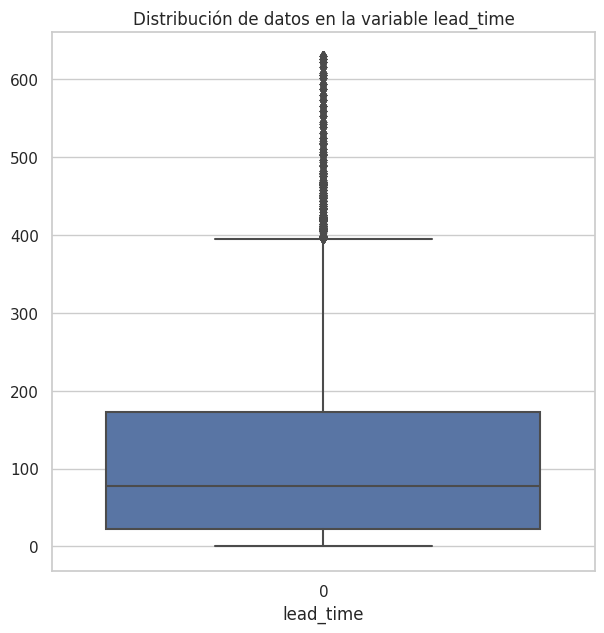

In [ ]:
sns.boxplot(df_hoteles_train_copy_1['lead_time']).set(xlabel='lead_time',title='Distribución de datos en la variable lead_time')

###Analisis sobre las variables adults / children / babies

In [ ]:
Outliers_adults=detect_outliers(df_hoteles_train_copy_1,'adults')
print(f'Cantidad de outliers en adults: {Outliers_adults.shape[0]}')

Outliers_children=detect_outliers(df_hoteles_train_copy_1,'children')
print(f'Cantidad de outliers en children: {Outliers_children.shape[0]}')

Outliers_babies=detect_outliers(df_hoteles_train_copy_1,'babies')
print(f'Cantidad de outliers en babies: {Outliers_babies.shape[0]}')

Cantidad de outliers en adults: 14950
Cantidad de outliers en children: 4452
Cantidad de outliers en babies: 428


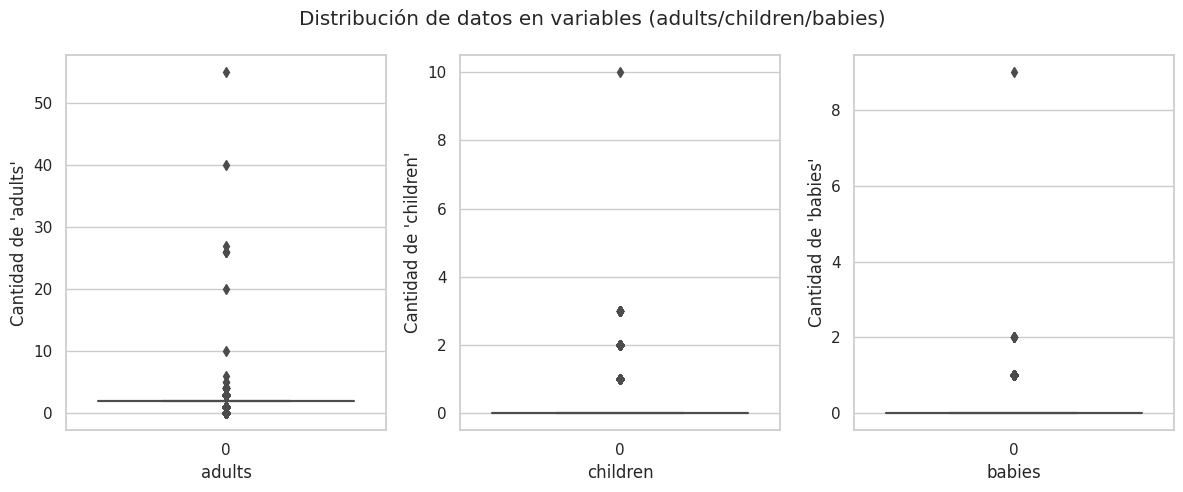

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(12, 5))
fig.suptitle('Distribución de datos en variables (adults/children/babies)')

sns_hist=sns.boxplot(data=df_hoteles_train_copy_1['babies']).set(xlabel="babies",ylabel="Cantidad de 'babies'")
plt.sca(ax[0])

sns_hist=sns.boxplot(data=df_hoteles_train_copy_1['adults']).set(xlabel="adults",ylabel="Cantidad de 'adults'")
plt.sca(ax[1])

sns_hist=sns.boxplot(data=df_hoteles_train_copy_1['children']).set(xlabel="children",ylabel="Cantidad de 'children'")
plt.sca(ax[2])

fig.tight_layout()
fig.show()

### Analisis sobre variables stays_in_weekend_nights/stays_in_week_nights

In [ ]:
Outliers_stays_in_weekend_nights=detect_outliers(df_hoteles_train_copy_1,'stays_in_weekend_nights')
print(f'Cantidad de outliers en stays_in_weekend_nights: {Outliers_stays_in_weekend_nights.shape[0]}')

Outliers_stays_in_week_nights=detect_outliers(df_hoteles_train_copy_1,'stays_in_week_nights')
print(f'Cantidad de outliers en stays_in_week_nights: {Outliers_stays_in_week_nights.shape[0]}')

Cantidad de outliers en stays_in_weekend_nights: 144
Cantidad de outliers en stays_in_week_nights: 1724


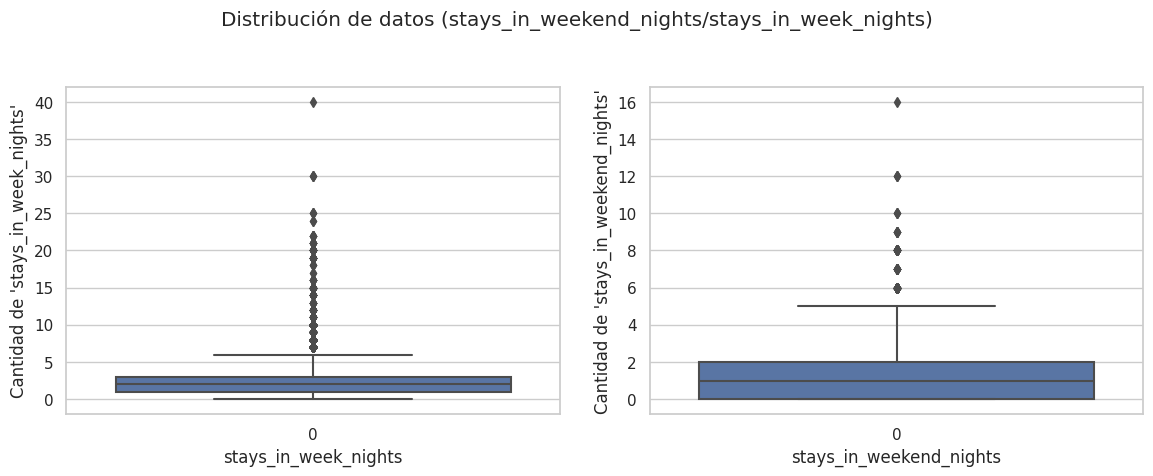

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12, 5))
fig.suptitle('Distribución de datos (stays_in_weekend_nights/stays_in_week_nights)')

sns_hist=sns.boxplot(data=df_hoteles_train_copy_1['stays_in_weekend_nights']).set(xlabel="stays_in_weekend_nights",ylabel="Cantidad de 'stays_in_weekend_nights'")
plt.sca(ax[0])

sns_hist=sns.boxplot(data=df_hoteles_train_copy_1['stays_in_week_nights']).set(xlabel="stays_in_week_nights",ylabel="Cantidad de 'stays_in_week_nights'")
plt.sca(ax[1])

fig.tight_layout(pad=2.0) #Evita que los gráficos se superpongan entre si
fig.show()

### Analisis sobre variables required_car_parking_spaces/total_of_special_requests

In [ ]:
Outliers_requered_car_parking_spaces=detect_outliers(df_hoteles_train_copy_1,'required_car_parking_spaces')
print(f'Cantidad de outliers en requered_car_parking_spaces: {Outliers_requered_car_parking_spaces.shape[0]}')

Outliers_total_of_special_requests=detect_outliers(df_hoteles_train_copy_1,'total_of_special_requests')
print(f'Cantidad de outliers en total_of_special_requests: {Outliers_total_of_special_requests.shape[0]}')

Cantidad de outliers en requered_car_parking_spaces: 3072
Cantidad de outliers en total_of_special_requests: 1358


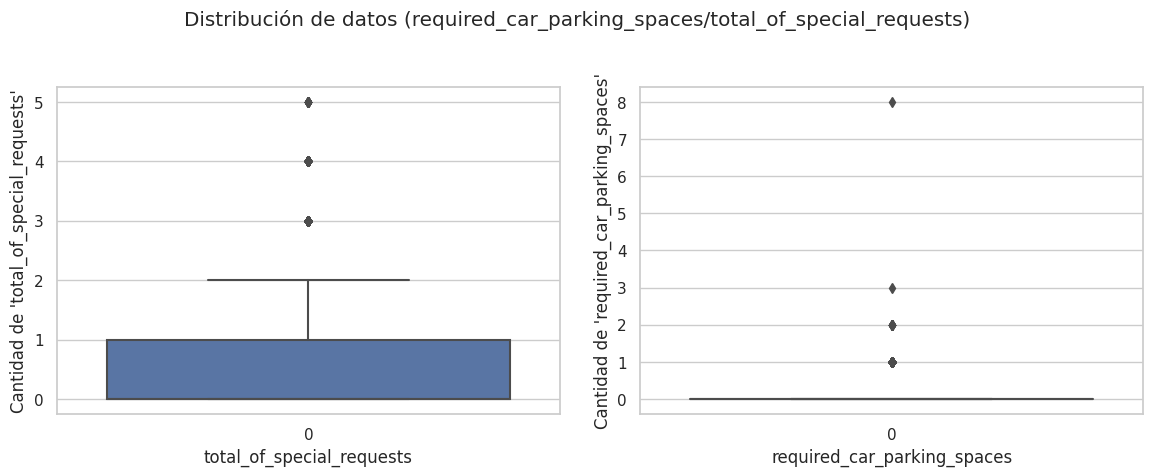

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12, 5))
fig.suptitle('Distribución de datos (required_car_parking_spaces/total_of_special_requests)')

sns_hist=sns.boxplot(data=df_hoteles_train_copy_1['required_car_parking_spaces']).set(xlabel="required_car_parking_spaces",ylabel="Cantidad de 'required_car_parking_spaces'")
plt.sca(ax[0])

sns_hist=sns.boxplot(data=df_hoteles_train_copy_1['total_of_special_requests']).set(xlabel="total_of_special_requests",ylabel="Cantidad de 'total_of_special_requests'")
plt.sca(ax[1])

fig.tight_layout(pad=2.0) #Evita que los gráficos se superpongan entre si
fig.show()

### Analisis sobre variable days_in_waiting_list/adr

In [ ]:
Outliers_days_in_waiting_list=detect_outliers(df_hoteles_train_copy_1,'days_in_waiting_list')
print(f'Cantidad de outliers en days_in_waiting_list: {Outliers_days_in_waiting_list.shape[0]}')

Outliers_adr=detect_outliers(df_hoteles_train_copy_1,'adr')
print(f'Cantidad de outliers en adr: {Outliers_adr.shape[0]}')

Cantidad de outliers en days_in_waiting_list: 2235
Cantidad de outliers en adr: 2025


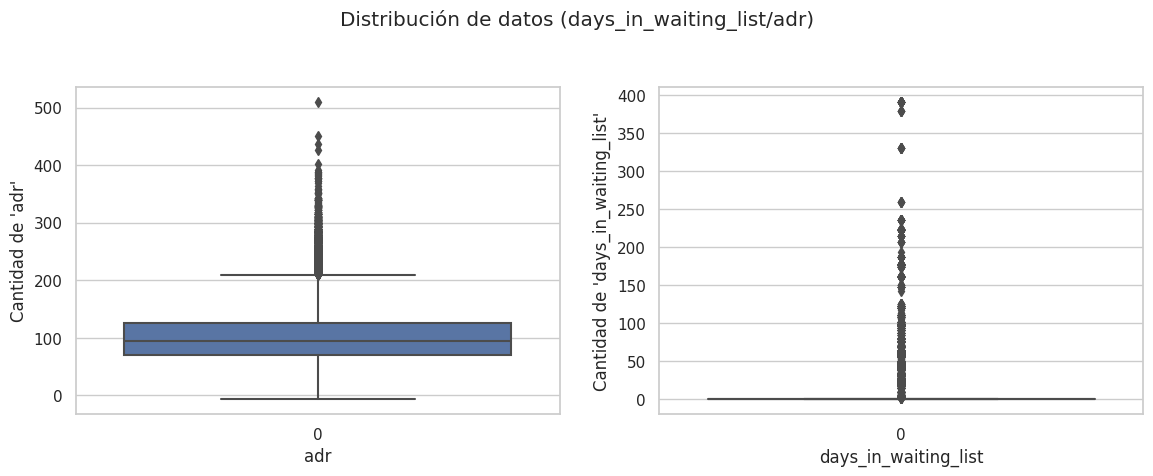

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12, 5))
fig.suptitle('Distribución de datos (days_in_waiting_list/adr)')

sns_hist=sns.boxplot(data=df_hoteles_train_copy_1['days_in_waiting_list']).set(xlabel="days_in_waiting_list",ylabel="Cantidad de 'days_in_waiting_list'")
plt.sca(ax[0])

sns_hist=sns.boxplot(data=df_hoteles_train_copy_1['adr']).set(xlabel="adr",ylabel="Cantidad de 'adr'")
plt.sca(ax[1])

fig.tight_layout(pad=2.0) #Evita que los gráficos se superpongan entre si
fig.show()

### Conclusión
Observando estos gráficos, podemos considerar como outliers:

1.   Reservas con *lead_time* superior a 400
2.   Reservas con *adults* distinta a 1
3.   Reservas con *children* y *babies* distinta a 0
4.   Reservas con *stays_in_week_nights* superior a 6
5.   Reservas con *stays_in_weekend_nights* superior a 5
6.   Reservas con *total_of_special_request* superior a 2
7.   Reservas con *required_car_parking_spaces* distinta de 0
8.   Reservas con *adr* superior con 200
9.   Reservas con *days_in_waiting_list* distinta de 0



##**Analisis multivariado**

###Lead_time vs Is_Canceled
Calculamos la distancia de Mahalanobis entre lead_time y is_canceled:

In [ ]:
df_mahalobis = calculate_mahalanobis_distance(df_hoteles_train_copy_1,'is_canceled','lead_time')

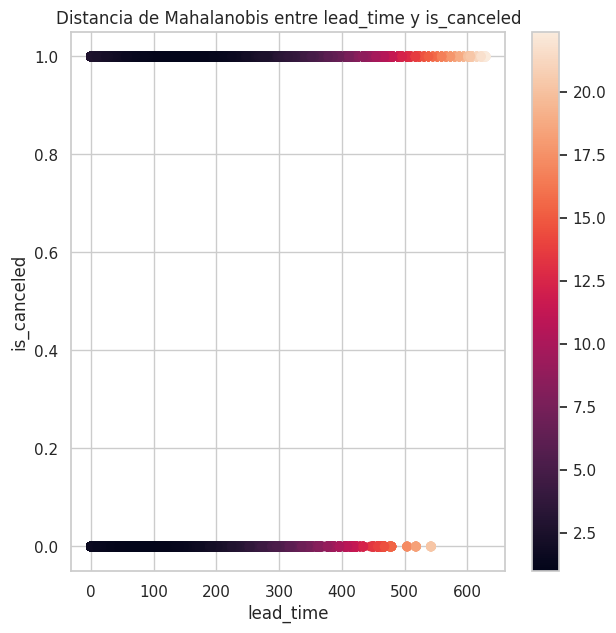

In [ ]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['r', 'g', 'b'])
norm = plt.Normalize(min(df_mahalobis['mahalanobis']), max(df_mahalobis['mahalanobis']))

plt.scatter(df_mahalobis['lead_time'], df_mahalobis['is_canceled'], c=df_mahalobis['mahalanobis'], norm=norm)

plt.colorbar()
plt.xlabel('lead_time')
plt.ylabel('is_canceled')
plt.title('Distancia de Mahalanobis entre lead_time y is_canceled')
plt.show()

####Conclusion de Lead_time Vs Is_Canceled
* para reservas canceladas: con mas de 400 ya las detecta como outliers
* para reservas no canceladas: con mas de 350 ya las detecta como outliers

###Aduts vs Is_canceled
Calculamos la distancia de Mahalanobis entre adults y is_canceled:

In [ ]:
df_mahalobis = calculate_mahalanobis_distance(df_hoteles_train_copy_1,'is_canceled','adults')

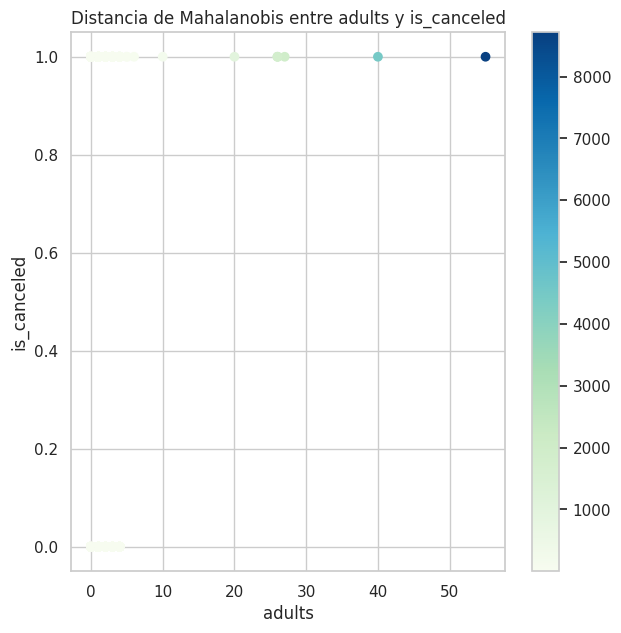

In [ ]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['r', 'g', 'b'])
norm = plt.Normalize(min(df_mahalobis['mahalanobis']), max(df_mahalobis['mahalanobis']))

plt.scatter(df_mahalobis['adults'], df_mahalobis['is_canceled'], c=df_mahalobis['mahalanobis'], cmap='GnBu', norm=norm)

plt.colorbar()
plt.xlabel('adults')
plt.ylabel('is_canceled')
plt.title('Distancia de Mahalanobis entre adults y is_canceled')
plt.show()

####conclusion respecto de adults:
* para reservas canceladas: con mas de 40 adultos
* para reservas no canceladas:no detecta outsiders


###children vs Is_canceled

Calculamos la distancia de Mahalanobis entre children y is_canceled:

In [ ]:
df_mahalobis = calculate_mahalanobis_distance(df_hoteles_train_copy_1,'is_canceled','children')

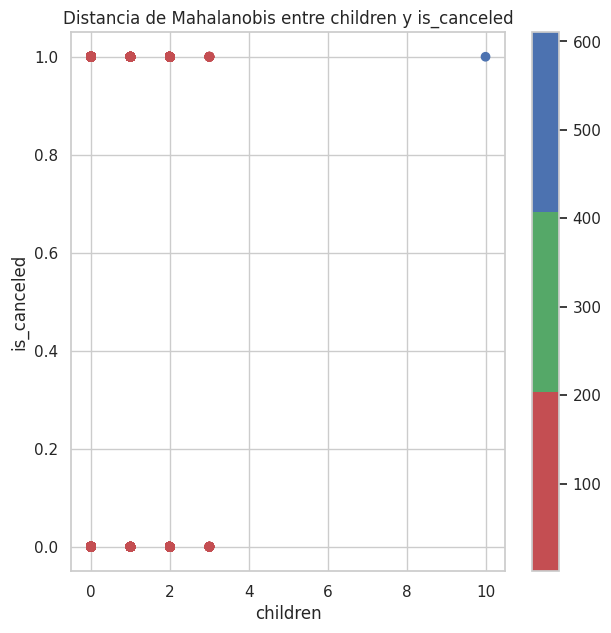

In [ ]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['r', 'g', 'b'])
norm = plt.Normalize(min(df_mahalobis['mahalanobis']), max(df_mahalobis['mahalanobis']))

plt.scatter(df_mahalobis['children'], df_mahalobis['is_canceled'], c=df_mahalobis['mahalanobis'], cmap=cmap, norm=norm)

plt.colorbar()
plt.xlabel('children')
plt.ylabel('is_canceled')
plt.title('Distancia de Mahalanobis entre children y is_canceled')
plt.show()

####conclusion respecto de children:
* para reservas canceladas: con 10 niños
* para reservas no canceladas:no detecta outsiders


###Babies vs Is_canceled

Calculamos la distancia de Mahalanobis entre babies y is_canceled:

In [ ]:
df_mahalobis = calculate_mahalanobis_distance(df_hoteles_train_copy_1,'is_canceled','babies')

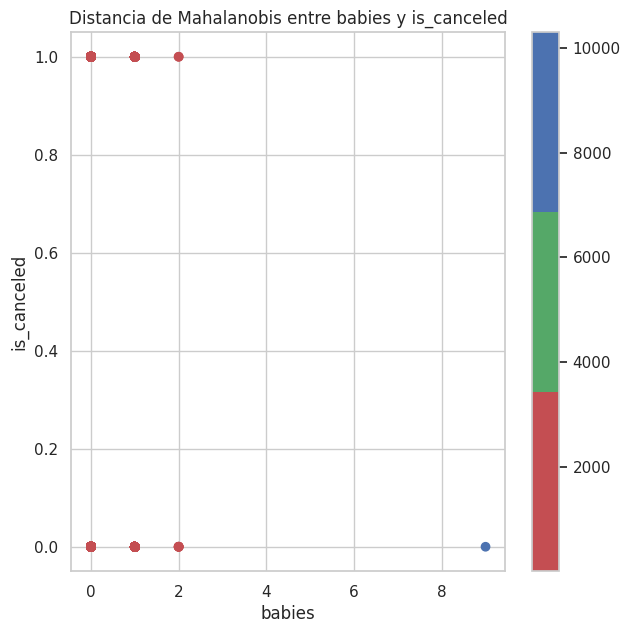

In [ ]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['r', 'g', 'b'])
norm = plt.Normalize(min(df_mahalobis['mahalanobis']), max(df_mahalobis['mahalanobis']))

plt.scatter(df_mahalobis['babies'], df_mahalobis['is_canceled'], c=df_mahalobis['mahalanobis'], cmap=cmap, norm=norm)

plt.colorbar()
plt.xlabel('babies')
plt.ylabel('is_canceled')
plt.title('Distancia de Mahalanobis entre babies y is_canceled')
plt.show()

####conclusion respecto de babies:
* para reservas canceladas: no detecta outliers
* para reservas no canceladas:detecta con mas de 8


###stays_in_weekend_nights vs Is_canceled

Calculamos la distancia de Mahalanobis entre stays_in_weekend_nights y is_canceled:

In [ ]:
df_mahalobis = calculate_mahalanobis_distance(df_hoteles_train_copy_1,'is_canceled','stays_in_weekend_nights')

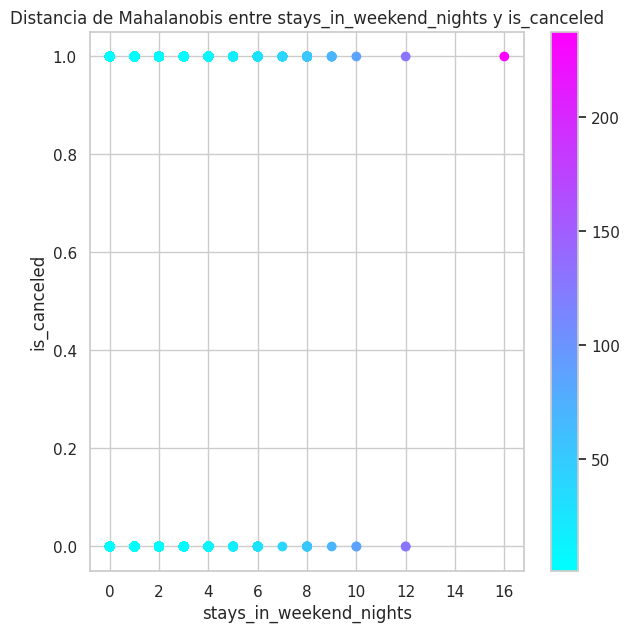

In [ ]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['r', 'g', 'b'])
norm = plt.Normalize(min(df_mahalobis['mahalanobis']), max(df_mahalobis['mahalanobis']))

plt.scatter(df_mahalobis['stays_in_weekend_nights'], df_mahalobis['is_canceled'], c=df_mahalobis['mahalanobis'], cmap='cool', norm=norm)

plt.colorbar()
plt.xlabel('stays_in_weekend_nights')
plt.ylabel('is_canceled')
plt.title('Distancia de Mahalanobis entre stays_in_weekend_nights y is_canceled')
plt.show()

####conclusion respecto de stays_in_weekend_nights:
* con mas de 10 noches ya las detecta como outliers sin importar si esta cancelada o no


###stays_in_week_nights vs Is_canceled

Calculamos la distancia de Mahalanobis entre stays_in_week_nights y is_canceled:

In [ ]:
df_mahalobis = calculate_mahalanobis_distance(df_hoteles_train_copy_1,'is_canceled','stays_in_week_nights')

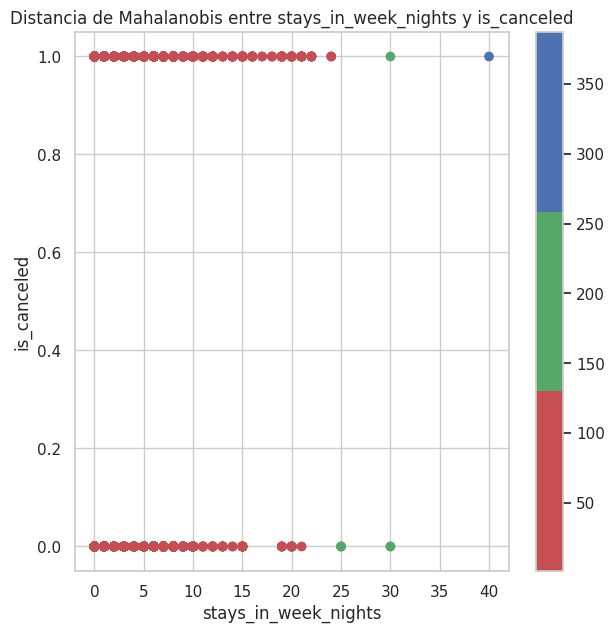

In [ ]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['r', 'g', 'b'])
norm = plt.Normalize(min(df_mahalobis['mahalanobis']), max(df_mahalobis['mahalanobis']))

plt.scatter(df_mahalobis['stays_in_week_nights'], df_mahalobis['is_canceled'], c=df_mahalobis['mahalanobis'], cmap=cmap, norm=norm)

plt.colorbar()
plt.xlabel('stays_in_week_nights')
plt.ylabel('is_canceled')
plt.title('Distancia de Mahalanobis entre stays_in_week_nights y is_canceled')
plt.show()

####conclusion respecto de stays_in_week_nights:
* para reservas canceladas: con mas de 30 las detecta como outliers
* para reservas no canceladas: con el atributo mator a 25 alcanza para detectrla como outlier


#Eliminacion de outliers
* para los de reserva cancelada borro:
  * Lead time >=540
  * Stays in week_nights >=40
  * stays_in_weekend_nights >=16
  * babies > 8
  * children >= 10
  * adults > 50

* Para los de reserva no cancelada borro:
  * Lead time >= 470
  * stays_in_weekend_nights >=16

por el momento se eliminan los puntos de color azul segun la distancia de mahalanubbis

In [ ]:
#       1  23  4                 4     3   3  4                 4      32                    1
#df.drop(df[(df['precio_unitario'] >400) & (df['precio_unitario'] < 600)].index, inplace=True)
df_hoteles_train_sin_outliers=df_hoteles_train_copy_1.drop(df_hoteles_train_copy_1[(df_hoteles_train_copy_1['is_canceled']==1)&(df_hoteles_train_copy_1['lead_time']>=540)&(df_hoteles_train_copy_1['stays_in_week_nights']>=40)&(df_hoteles_train_copy_1['stays_in_weekend_nights']>=16)&(df_hoteles_train_copy_1['babies']>8)&(df_hoteles_train_copy_1['children']>=10)&(df_hoteles_train_copy_1['adults']>=50)].index,axis=0, inplace=True)
df_hoteles_train_sin_outliers_2=df_hoteles_train_copy_1.drop(df_hoteles_train_copy_1[(df_hoteles_train_copy_1['is_canceled']==0)|(df_hoteles_train_copy_1['lead_time']>=470)&(df_hoteles_train_copy_1['stays_in_weekend_nights']>=16)].index,axis=0, inplace=True)

#Caso de los outliers detectados por analisis univariado
se procedera a ver los casos que el analisis univariado detecto como outliers:
1.   Reservas con *total_of_special_request* superior a 2
2.   Reservas con *required_car_parking_spaces* distinta de 0
3.   Reservas con *adr* superior con 200
4.   Reservas con *days_in_waiting_list* distinta de 0

In [ ]:
posibles_outliers_Total_special_request=df_hoteles_train_copy_1[df_hoteles_train_copy_1['total_of_special_requests']>=2]
posibles_outliers_Total_special_request
#                           1                       23                       4                           4   32                           1
df_hoteles_train_copy_1.drop(df_hoteles_train_copy_1[(df_hoteles_train_copy_1['total_of_special_requests']>=2)].index,axis=0, inplace=True)

In [ ]:
posibles_outliers_required_car_parking_spaces=df_hoteles_train_copy_1[df_hoteles_train_copy_1['required_car_parking_spaces']!=0]
posibles_outliers_required_car_parking_spaces

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,arrival_date


In [ ]:
posibles_outliers_adr=df_hoteles_train_copy_1[df_hoteles_train_copy_1['adr']>=200]
posibles_outliers_adr

df_hoteles_train_copy_1.drop(df_hoteles_train_copy_1[(df_hoteles_train_copy_1['adr']>=200)].index,axis=0, inplace=True)

despues de este analisis, no quedo ningun outlier por eliminar


##Salida del dataset depurado

In [ ]:
df_hoteles_train_copy_1.to_csv('/content/drive/MyDrive/Tp_Datos_2023_2°/hotels_train_depurado.csv',index=False)